In [7]:
#导入数据
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as data
from torch.utils.data import random_split
import torch.optim as optim
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

def prepare_data(random_state=None):
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    dataset = datasets.CIFAR10(root="./dataset", train=True, download=False, transform=transform)
    testset = datasets.CIFAR10(root="./dataset", train=False, download=False, transform=transform)
    
    # 使用 random_split 函数划分数据，并指定随机种子
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_data, val_data = random_split(dataset, [train_size, val_size], generator=torch.Generator().manual_seed(random_state))

    train_loader = data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0)
    val_loader = data.DataLoader(val_data, batch_size=64, shuffle=False, num_workers=0)
    test_loader = data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=0)

    return train_loader, val_loader, test_loader


In [2]:
#在测试集和验证集上测试
def test_model(loader, model, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_loss /= len(loader)
        accuracy = 100 * correct / total
        print('Average Test Loss: {:.4f}, Accuracy on Test Set: {:.2f}%'.format(test_loss, accuracy))

def validate_model(loader, model, criterion):
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        val_loss /= len(loader)
        accuracy = 100 * correct / total
        print('Validation Loss: {:.4f}, Accuracy on Val_data: {:.2f}%'.format(val_loss, accuracy))
        return val_loss
    


In [11]:
#CNN的初始定义
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

class CNNLayer(nn.Module):
    def __init__(self, in_feature_maps, out_feature_maps, downsample=True):
        super(CNNLayer, self).__init__()

        self.stride = 1
        self.conv0 = nn.Conv2d(in_feature_maps, out_feature_maps,kernel_size=3,stride = self.stride, padding = 1)
        self.bn0 = nn.BatchNorm2d(out_feature_maps)
        self.conv1 = nn.Conv2d(out_feature_maps, out_feature_maps,kernel_size=3, stride = 1, padding = 1)
        self.bn1 = nn.BatchNorm2d(out_feature_maps)
        self.Maxpool2 = nn.MaxPool2d(2,2)
        self.dropout = nn.Dropout(0.2)
    def forward(self, input):
        x = F.relu(self.dropout(self.bn0(self.conv0(input))))
        x = F.relu(self.dropout(self.bn1(self.conv1(x))))
        x = self.Maxpool2(x)
        return x

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv0 = nn.Conv2d(3, 32, 3, stride=1, padding=1)
        self.bn0 = nn.BatchNorm2d(32)
        self.maxpool = nn.MaxPool2d(3, 2, 1)
        self.cnnlayer1 = CNNLayer(32, 64, False)
        self.cnnlayer2 = CNNLayer(64, 128, False)
        self.cnnlayer3 = CNNLayer(128, 256, False)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(256, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.2)
        self.fc = nn.Linear(256, 10)

        self.dropout = nn.Dropout(0.15)

    def forward(self, input):
        x = F.relu(self.bn0(self.dropout(self.conv0(input))))
        x = self.maxpool(x)
        x = self.cnnlayer1(x)
        x = self.cnnlayer2(x)
        x = self.cnnlayer3(x)
        x = self.avgpool(x)
        x = x.view(x.shape[0], -1)
        x = self.dropout1(x)
        x = F.relu(self.dropout1(self.bn1(self.fc1(x))))
        x = self.fc(x)

        return x


Epoch [1/30], Step [100/625], Loss: 2.0219
Epoch [1/30], Step [200/625], Loss: 1.4253
Epoch [1/30], Step [300/625], Loss: 1.3439
Epoch [1/30], Step [400/625], Loss: 1.2919
Epoch [1/30], Step [500/625], Loss: 1.1671
Epoch [1/30], Step [600/625], Loss: 1.3029
Validation Loss: 1.7930, Accuracy on Val_data: 39.77%
Validation loss decreased (inf --> 1.793036). Saving model...
Epoch :1, Train Loss: 1.4546, Validation Loss: 1.7930
Epoch [2/30], Step [100/625], Loss: 1.3490
Epoch [2/30], Step [200/625], Loss: 1.2699
Epoch [2/30], Step [300/625], Loss: 1.0136
Epoch [2/30], Step [400/625], Loss: 1.1152
Epoch [2/30], Step [500/625], Loss: 0.9833
Epoch [2/30], Step [600/625], Loss: 0.9026
Validation Loss: 1.0232, Accuracy on Val_data: 63.26%
Validation loss decreased (1.793036 --> 1.023190). Saving model...
Epoch :2, Train Loss: 1.0888, Validation Loss: 1.0232
Epoch [3/30], Step [100/625], Loss: 0.9040
Epoch [3/30], Step [200/625], Loss: 0.7693
Epoch [3/30], Step [300/625], Loss: 0.9307
Epoch [3/3

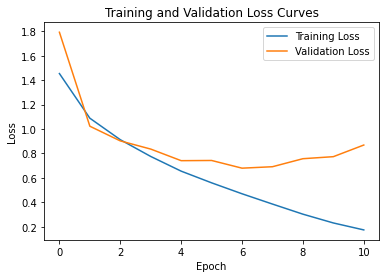

Average Test Loss: 0.8738, Accuracy on Test Set: 77.41%


In [10]:


model = CNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader, val_loader, test_loader = prepare_data(36)

lr = 0.001
decay_factor = 0.5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=lr)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.3)  # Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=decay_factor, patience=5)

train_losses = []
val_losses = [] 
best_val_loss = float('inf')
patience = 4  
wait = 0

num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    val_loss = validate_model(val_loader, model, criterion)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
        torch.save(model.state_dict(), "best_model.pth")
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"No improvement for {patience} epochs, stopping early.")
            break
    scheduler.step(val_loss)


    print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch + 1, epoch_loss, val_loss))

# Plotting the loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

test_model(test_loader, model, criterion)

In [12]:
#4月19号晚上8点半的版本
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init

class CNNLayer(nn.Module):
    def __init__(self, in_feature_maps, out_feature_maps, downsample=True):
        super(CNNLayer, self).__init__()

        self.stride = 2
        self.conv0 = nn.Conv2d(in_feature_maps, out_feature_maps,kernel_size=3,stride = self.stride, padding = 2)
        self.bn0 = nn.BatchNorm2d(out_feature_maps)
        self.conv1 = nn.Conv2d(out_feature_maps, out_feature_maps,kernel_size=3, stride = self.stride, padding = 2)
        self.bn1 = nn.BatchNorm2d(out_feature_maps)
        self.Maxpool2 = nn.MaxPool2d(2,2)
        self.dropout = nn.Dropout(0.2)
    def forward(self, input):
        x = F.relu(self.dropout(self.bn0(self.conv0(input))))
        x = F.relu(self.dropout(self.bn1(self.conv1(x))))
        x = self.Maxpool2(x)
        return x

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv0 = nn.Conv2d(3, 10, 3, stride=1, padding=1)
        self.bn0 = nn.BatchNorm2d(10)
        self.dropout1 = nn.Dropout(0.2)
        self.maxpool = nn.MaxPool2d(2, 2, 1)
        self.cnnlayer1 = CNNLayer(10, 20, False)
        self.cnnlayer2 = CNNLayer(20, 40, False)
        self.cnnlayer3 = CNNLayer(40, 80, False)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(80, 160)
        self.bn1 = nn.BatchNorm1d(160)
        self.dropout2 = nn.Dropout(0.2)
        #self.fc2 = nn.Linear(512, 1024)
        #self.bn2 = nn.BatchNorm1d(1024)
        self.fc3 = nn.Linear(160, 10)

    def forward(self, input):
        x = F.relu(self.bn0(self.dropout1(self.conv0(input))))
        x = self.maxpool(x)
        x = self.cnnlayer1(x)
        x = self.cnnlayer2(x)
        x = self.cnnlayer3(x)
        x = self.avgpool(x)
        x = x.view(x.shape[0], -1)
        #x = self.dropout2(x)
        x = F.relu(self.dropout2(self.bn1(self.fc1(x))))
        #x = F.relu(self.bn1(self.fc1(x)))
        #x = F.relu(self.dropout2(self.bn2(self.fc2(x))))
        x = self.fc3(x)

        return x


Epoch [1/30], Step [100/625], Loss: 2.1374
Epoch [1/30], Step [200/625], Loss: 2.2515
Epoch [1/30], Step [300/625], Loss: 2.0536
Epoch [1/30], Step [400/625], Loss: 1.7190
Epoch [1/30], Step [500/625], Loss: 1.7753
Epoch [1/30], Step [600/625], Loss: 1.9302
Validation Loss: 1.9051, Accuracy on Val_data: 27.22%
Validation loss decreased (inf --> 1.905077). Saving model...
Epoch :1, Train Loss: 2.0213, Validation Loss: 1.9051
Epoch [2/30], Step [100/625], Loss: 1.5101
Epoch [2/30], Step [200/625], Loss: 1.6732
Epoch [2/30], Step [300/625], Loss: 1.7437
Epoch [2/30], Step [400/625], Loss: 1.5122
Epoch [2/30], Step [500/625], Loss: 1.6084
Epoch [2/30], Step [600/625], Loss: 1.5370
Validation Loss: 1.4768, Accuracy on Val_data: 45.51%
Validation loss decreased (1.905077 --> 1.476796). Saving model...
Epoch :2, Train Loss: 1.5590, Validation Loss: 1.4768
Epoch [3/30], Step [100/625], Loss: 1.5595
Epoch [3/30], Step [200/625], Loss: 1.2049
Epoch [3/30], Step [300/625], Loss: 1.4622
Epoch [3/3

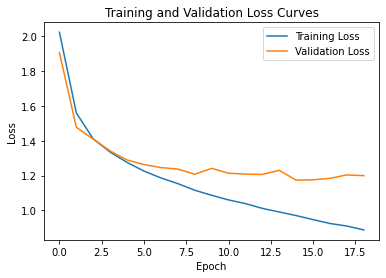

Average Test Loss: 1.1870, Accuracy on Test Set: 59.31%


In [15]:
model = CNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader, val_loader, test_loader = prepare_data(36)

lr = 0.001
decay_factor = 0.5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=lr)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.3)  # Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=decay_factor, patience=5)

train_losses = []
val_losses = [] 
best_val_loss = float('inf')
patience = 4  
wait = 0

num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    val_loss = validate_model(val_loader, model, criterion)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
        torch.save(model.state_dict(), "best_model.pth")
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"No improvement for {patience} epochs, stopping early.")
            break
    scheduler.step(val_loss)


    print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch + 1, epoch_loss, val_loss))

# Plotting the loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

test_model(test_loader, model, criterion)

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init

class CNNLayer(nn.Module):
    def __init__(self, in_feature_maps, out_feature_maps, downsample=True):
        super(CNNLayer, self).__init__()

        self.stride = 1
        self.conv0 = nn.Conv2d(in_feature_maps, out_feature_maps,kernel_size=3,stride = self.stride, padding = 1)
        self.bn0 = nn.BatchNorm2d(out_feature_maps)
        self.conv1 = nn.Conv2d(out_feature_maps, out_feature_maps,kernel_size=3, stride = 1, padding = 1)
        self.bn1 = nn.BatchNorm2d(out_feature_maps)
        self.Maxpool2 = nn.MaxPool2d(2,2)
        self.dropout = nn.Dropout(0.2)
    def forward(self, input):
        x = F.relu(self.dropout(self.bn0(self.conv0(input))))
        x = F.relu(self.dropout(self.bn1(self.conv1(x))))
        x = self.Maxpool2(x)
        return x

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv0 = nn.Conv2d(3, 16, 3, stride=1, padding=1)
        self.bn0 = nn.BatchNorm2d(16)
        self.dropout1 = nn.Dropout(0.15)
        self.maxpool = nn.MaxPool2d(3, 2, 1)
        self.cnnlayer1 = CNNLayer(16, 32, False)
        self.cnnlayer2 = CNNLayer(32, 64, False)
        self.cnnlayer3 = CNNLayer(64, 128, False)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(128, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.15)
        #self.fc2 = nn.Linear(512, 1024)
        #self.bn2 = nn.BatchNorm1d(1024)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, input):
        x = F.relu(self.bn0(self.dropout1(self.conv0(input))))
        x = self.maxpool(x)
        x = self.cnnlayer1(x)
        x = self.cnnlayer2(x)
        x = self.cnnlayer3(x)
        x = self.avgpool(x)
        x = x.view(x.shape[0], -1)
        #x = self.dropout2(x)
        x = F.relu(self.dropout2(self.bn1(self.fc1(x))))
        #x = F.relu(self.bn1(self.fc1(x)))
        #x = F.relu(self.dropout2(self.bn2(self.fc2(x))))
        x = self.fc3(x)

        return x


# 

Testing with learning rate: 0.001, decay factor: 0.3
Epoch [1/30], Step [100/625], Loss: 1.5197
Epoch [1/30], Step [200/625], Loss: 1.2864
Epoch [1/30], Step [300/625], Loss: 1.4317
Epoch [1/30], Step [400/625], Loss: 1.2204
Epoch [1/30], Step [500/625], Loss: 1.0888
Epoch [1/30], Step [600/625], Loss: 1.1615
Validation Loss: 1.1745, Accuracy on Val_data: 59.42%
Validation loss decreased (inf --> 1.174501). Saving model...
Epoch :1, Train Loss: 1.3886, Validation Loss: 1.1745
Epoch [2/30], Step [100/625], Loss: 1.1496
Epoch [2/30], Step [200/625], Loss: 1.2725
Epoch [2/30], Step [300/625], Loss: 1.1110
Epoch [2/30], Step [400/625], Loss: 0.7446
Epoch [2/30], Step [500/625], Loss: 1.1204
Epoch [2/30], Step [600/625], Loss: 1.0363
Validation Loss: 0.9357, Accuracy on Val_data: 66.06%
Validation loss decreased (1.174501 --> 0.935660). Saving model...
Epoch :2, Train Loss: 1.0218, Validation Loss: 0.9357
Epoch [3/30], Step [100/625], Loss: 0.9537
Epoch [3/30], Step [200/625], Loss: 0.6595


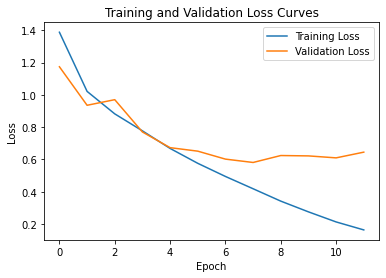

Testing with learning rate: 0.001, decay factor: 0.5
Epoch [1/30], Step [100/625], Loss: 1.6176
Epoch [1/30], Step [200/625], Loss: 1.3691
Epoch [1/30], Step [300/625], Loss: 1.3640
Epoch [1/30], Step [400/625], Loss: 1.3310
Epoch [1/30], Step [500/625], Loss: 1.0858
Epoch [1/30], Step [600/625], Loss: 0.8413
Validation Loss: 1.1945, Accuracy on Val_data: 56.26%
Validation loss decreased (inf --> 1.194478). Saving model...
Epoch :1, Train Loss: 1.3352, Validation Loss: 1.1945
Epoch [2/30], Step [100/625], Loss: 0.9708
Epoch [2/30], Step [200/625], Loss: 1.2447
Epoch [2/30], Step [300/625], Loss: 0.9860
Epoch [2/30], Step [400/625], Loss: 0.8954
Epoch [2/30], Step [500/625], Loss: 0.9172
Epoch [2/30], Step [600/625], Loss: 1.0080
Validation Loss: 0.9149, Accuracy on Val_data: 67.94%
Validation loss decreased (1.194478 --> 0.914902). Saving model...
Epoch :2, Train Loss: 0.9966, Validation Loss: 0.9149
Epoch [3/30], Step [100/625], Loss: 0.5038
Epoch [3/30], Step [200/625], Loss: 0.9194


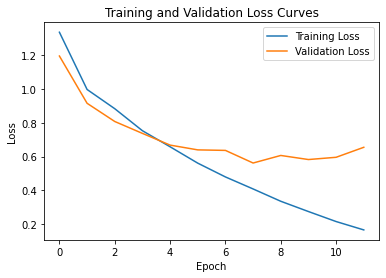

Testing with learning rate: 0.001, decay factor: 0.7
Epoch [1/30], Step [100/625], Loss: 1.7603
Epoch [1/30], Step [200/625], Loss: 1.5564
Epoch [1/30], Step [300/625], Loss: 1.3979
Epoch [1/30], Step [400/625], Loss: 1.2419
Epoch [1/30], Step [500/625], Loss: 1.3487
Epoch [1/30], Step [600/625], Loss: 1.2380
Validation Loss: 1.2093, Accuracy on Val_data: 55.95%
Validation loss decreased (inf --> 1.209300). Saving model...
Epoch :1, Train Loss: 1.3417, Validation Loss: 1.2093
Epoch [2/30], Step [100/625], Loss: 0.9794
Epoch [2/30], Step [200/625], Loss: 1.0122
Epoch [2/30], Step [300/625], Loss: 0.9331
Epoch [2/30], Step [400/625], Loss: 0.9421
Epoch [2/30], Step [500/625], Loss: 0.8779
Epoch [2/30], Step [600/625], Loss: 1.0005
Validation Loss: 0.9533, Accuracy on Val_data: 66.50%
Validation loss decreased (1.209300 --> 0.953279). Saving model...
Epoch :2, Train Loss: 1.0162, Validation Loss: 0.9533
Epoch [3/30], Step [100/625], Loss: 0.8617
Epoch [3/30], Step [200/625], Loss: 0.7725


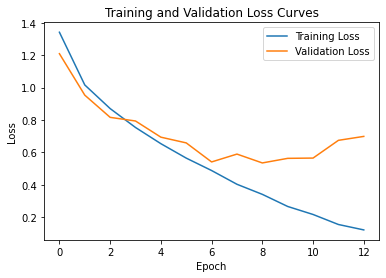

Testing with learning rate: 0.0005, decay factor: 0.3
Epoch [1/30], Step [100/625], Loss: 1.4690
Epoch [1/30], Step [200/625], Loss: 1.4940
Epoch [1/30], Step [300/625], Loss: 1.2756
Epoch [1/30], Step [400/625], Loss: 1.2323
Epoch [1/30], Step [500/625], Loss: 1.3499
Epoch [1/30], Step [600/625], Loss: 0.8094
Validation Loss: 1.2417, Accuracy on Val_data: 54.58%
Validation loss decreased (inf --> 1.241728). Saving model...
Epoch :1, Train Loss: 1.3691, Validation Loss: 1.2417
Epoch [2/30], Step [100/625], Loss: 0.9479
Epoch [2/30], Step [200/625], Loss: 1.0607
Epoch [2/30], Step [300/625], Loss: 1.0088
Epoch [2/30], Step [400/625], Loss: 1.1026
Epoch [2/30], Step [500/625], Loss: 1.1842
Epoch [2/30], Step [600/625], Loss: 1.0171
Validation Loss: 1.0749, Accuracy on Val_data: 59.45%
Validation loss decreased (1.241728 --> 1.074858). Saving model...
Epoch :2, Train Loss: 1.0376, Validation Loss: 1.0749
Epoch [3/30], Step [100/625], Loss: 0.9173
Epoch [3/30], Step [200/625], Loss: 1.1550

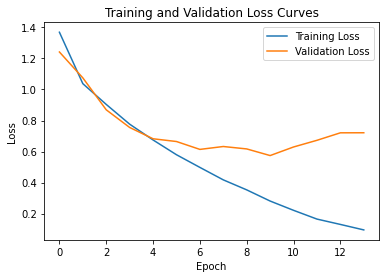

Testing with learning rate: 0.0005, decay factor: 0.5
Epoch [1/30], Step [100/625], Loss: 1.5528
Epoch [1/30], Step [200/625], Loss: 1.5303
Epoch [1/30], Step [300/625], Loss: 1.2459
Epoch [1/30], Step [400/625], Loss: 1.1301
Epoch [1/30], Step [500/625], Loss: 1.3534
Epoch [1/30], Step [600/625], Loss: 0.9576
Validation Loss: 1.0985, Accuracy on Val_data: 61.48%
Validation loss decreased (inf --> 1.098452). Saving model...
Epoch :1, Train Loss: 1.3253, Validation Loss: 1.0985
Epoch [2/30], Step [100/625], Loss: 1.1547
Epoch [2/30], Step [200/625], Loss: 0.9042
Epoch [2/30], Step [300/625], Loss: 0.8234
Epoch [2/30], Step [400/625], Loss: 1.1113
Epoch [2/30], Step [500/625], Loss: 1.1694
Epoch [2/30], Step [600/625], Loss: 0.9584
Validation Loss: 0.9807, Accuracy on Val_data: 65.64%
Validation loss decreased (1.098452 --> 0.980668). Saving model...
Epoch :2, Train Loss: 1.0133, Validation Loss: 0.9807
Epoch [3/30], Step [100/625], Loss: 0.9373
Epoch [3/30], Step [200/625], Loss: 0.9273

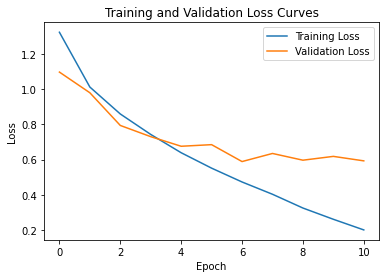

Testing with learning rate: 0.0005, decay factor: 0.7
Epoch [1/30], Step [100/625], Loss: 1.3782
Epoch [1/30], Step [200/625], Loss: 1.5294
Epoch [1/30], Step [300/625], Loss: 1.2850
Epoch [1/30], Step [400/625], Loss: 1.0114
Epoch [1/30], Step [500/625], Loss: 1.1550
Epoch [1/30], Step [600/625], Loss: 1.0201
Validation Loss: 1.1609, Accuracy on Val_data: 58.59%
Validation loss decreased (inf --> 1.160918). Saving model...
Epoch :1, Train Loss: 1.3147, Validation Loss: 1.1609
Epoch [2/30], Step [100/625], Loss: 0.8668
Epoch [2/30], Step [200/625], Loss: 0.8814
Epoch [2/30], Step [300/625], Loss: 1.0789
Epoch [2/30], Step [400/625], Loss: 0.8794
Epoch [2/30], Step [500/625], Loss: 0.8660
Epoch [2/30], Step [600/625], Loss: 0.8347
Validation Loss: 0.9024, Accuracy on Val_data: 67.99%
Validation loss decreased (1.160918 --> 0.902412). Saving model...
Epoch :2, Train Loss: 0.9919, Validation Loss: 0.9024
Epoch [3/30], Step [100/625], Loss: 0.7982
Epoch [3/30], Step [200/625], Loss: 0.7674

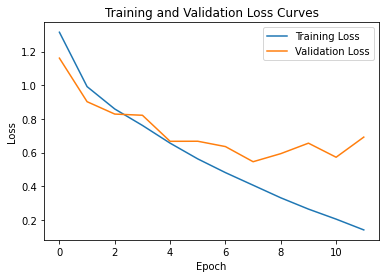

Testing with learning rate: 0.0001, decay factor: 0.3
Epoch [1/30], Step [100/625], Loss: 1.5187
Epoch [1/30], Step [200/625], Loss: 1.1891
Epoch [1/30], Step [300/625], Loss: 1.3550
Epoch [1/30], Step [400/625], Loss: 1.1599
Epoch [1/30], Step [500/625], Loss: 1.3281
Epoch [1/30], Step [600/625], Loss: 0.9908
Validation Loss: 1.4086, Accuracy on Val_data: 49.93%
Validation loss decreased (inf --> 1.408640). Saving model...
Epoch :1, Train Loss: 1.3270, Validation Loss: 1.4086
Epoch [2/30], Step [100/625], Loss: 0.7843
Epoch [2/30], Step [200/625], Loss: 1.0948
Epoch [2/30], Step [300/625], Loss: 1.0821
Epoch [2/30], Step [400/625], Loss: 0.9113
Epoch [2/30], Step [500/625], Loss: 0.9867
Epoch [2/30], Step [600/625], Loss: 1.0187
Validation Loss: 0.9796, Accuracy on Val_data: 63.88%
Validation loss decreased (1.408640 --> 0.979594). Saving model...
Epoch :2, Train Loss: 1.0108, Validation Loss: 0.9796
Epoch [3/30], Step [100/625], Loss: 0.6121
Epoch [3/30], Step [200/625], Loss: 0.8715

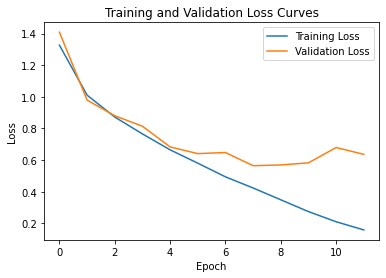

Testing with learning rate: 0.0001, decay factor: 0.5
Epoch [1/30], Step [100/625], Loss: 1.5036
Epoch [1/30], Step [200/625], Loss: 1.2066
Epoch [1/30], Step [300/625], Loss: 1.2783
Epoch [1/30], Step [400/625], Loss: 1.0952
Epoch [1/30], Step [500/625], Loss: 1.0344
Epoch [1/30], Step [600/625], Loss: 1.1143
Validation Loss: 1.2828, Accuracy on Val_data: 54.83%
Validation loss decreased (inf --> 1.282761). Saving model...
Epoch :1, Train Loss: 1.3302, Validation Loss: 1.2828
Epoch [2/30], Step [100/625], Loss: 1.1938
Epoch [2/30], Step [200/625], Loss: 1.0783
Epoch [2/30], Step [300/625], Loss: 1.0729
Epoch [2/30], Step [400/625], Loss: 0.9020
Epoch [2/30], Step [500/625], Loss: 0.7956
Epoch [2/30], Step [600/625], Loss: 0.9513
Validation Loss: 0.9576, Accuracy on Val_data: 65.85%
Validation loss decreased (1.282761 --> 0.957624). Saving model...
Epoch :2, Train Loss: 1.0257, Validation Loss: 0.9576
Epoch [3/30], Step [100/625], Loss: 0.7698
Epoch [3/30], Step [200/625], Loss: 0.6814

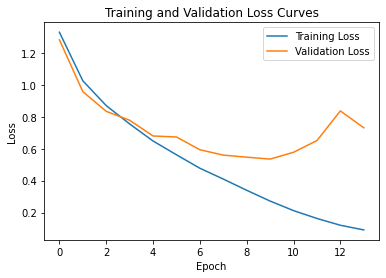

Testing with learning rate: 0.0001, decay factor: 0.7
Epoch [1/30], Step [100/625], Loss: 1.6995
Epoch [1/30], Step [200/625], Loss: 1.3537
Epoch [1/30], Step [300/625], Loss: 1.1017
Epoch [1/30], Step [400/625], Loss: 1.1832
Epoch [1/30], Step [500/625], Loss: 0.9521
Epoch [1/30], Step [600/625], Loss: 0.8879
Validation Loss: 1.0392, Accuracy on Val_data: 62.90%
Validation loss decreased (inf --> 1.039248). Saving model...
Epoch :1, Train Loss: 1.3162, Validation Loss: 1.0392
Epoch [2/30], Step [100/625], Loss: 0.8584
Epoch [2/30], Step [200/625], Loss: 1.0979
Epoch [2/30], Step [300/625], Loss: 1.1657
Epoch [2/30], Step [400/625], Loss: 0.9793
Epoch [2/30], Step [500/625], Loss: 1.0479
Epoch [2/30], Step [600/625], Loss: 0.8661
Validation Loss: 0.9642, Accuracy on Val_data: 65.49%
Validation loss decreased (1.039248 --> 0.964211). Saving model...
Epoch :2, Train Loss: 0.9928, Validation Loss: 0.9642
Epoch [3/30], Step [100/625], Loss: 0.9923
Epoch [3/30], Step [200/625], Loss: 0.7697

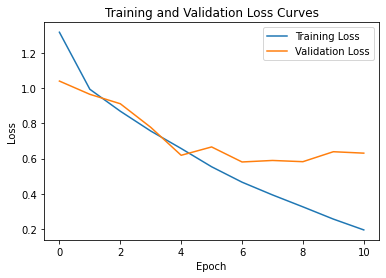

In [11]:
import torch.optim as optim

learning_rates = [0.001, 0.0005, 0.0001]  # 不同的学习率
decay_factors = [0.3, 0.5, 0.7]  # 不同的衰减因子

for lr in learning_rates:
    for decay_factor in decay_factors:
        print(f"Testing with learning rate: {lr}, decay factor: {decay_factor}")

        # 初始化模型、优化器和学习率调度器
        model = ResNet()
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)

        train_loader, val_loader, test_loader = prepare_data(36)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adamax(model.parameters(), lr=0.001)
        #scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.3)  # Learning rate scheduler
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.3, patience=5)

        train_losses = []
        val_losses = [] 
        best_val_loss = float('inf')
        patience = 4 
        wait = 0

        num_epochs = 30
        for epoch in range(num_epochs):
            running_loss = 0.0
            for i, (images, labels) in enumerate(train_loader):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                running_loss += loss.item()

                if (i + 1) % 100 == 0:
                    print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                          .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

            epoch_loss = running_loss / len(train_loader)
            train_losses.append(epoch_loss)

            val_loss = validate_model(val_loader, model, criterion)
            val_losses.append(val_loss)

            if val_loss < best_val_loss:
                print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
                torch.save(model.state_dict(), "best_model.pth")
                best_val_loss = val_loss
                wait = 0
            else:
                wait += 1
                if wait >= patience:
                    print(f"No improvement for {patience} epochs, stopping early.")
                    break

            scheduler.step(val_loss)


            print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
                  .format(epoch + 1, epoch_loss, val_loss))

        plt.plot(train_losses, label='Training Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss Curves')
        plt.legend()
        plt.show()

        #test_model(test_loader, model, criterion)


Testing with learning rate: 0.005, decay factor: 0.3
Epoch [1/30], Step [100/625], Loss: 1.6897
Epoch [1/30], Step [200/625], Loss: 1.5626
Epoch [1/30], Step [300/625], Loss: 1.5314
Epoch [1/30], Step [400/625], Loss: 1.3393
Epoch [1/30], Step [500/625], Loss: 1.5502
Epoch [1/30], Step [600/625], Loss: 1.2938
Validation Loss: 1.7331, Accuracy on Val_data: 40.59%
Validation loss decreased (inf --> 1.733114). Saving model...
Epoch :1, Train Loss: 1.5486, Validation Loss: 1.7331
Epoch [2/30], Step [100/625], Loss: 1.1317
Epoch [2/30], Step [200/625], Loss: 1.2717
Epoch [2/30], Step [300/625], Loss: 1.4192
Epoch [2/30], Step [400/625], Loss: 1.3173
Epoch [2/30], Step [500/625], Loss: 1.3271
Epoch [2/30], Step [600/625], Loss: 1.2328
Validation Loss: 1.1501, Accuracy on Val_data: 58.70%
Validation loss decreased (1.733114 --> 1.150062). Saving model...
Epoch :2, Train Loss: 1.2376, Validation Loss: 1.1501
Epoch [3/30], Step [100/625], Loss: 1.1087
Epoch [3/30], Step [200/625], Loss: 1.2497


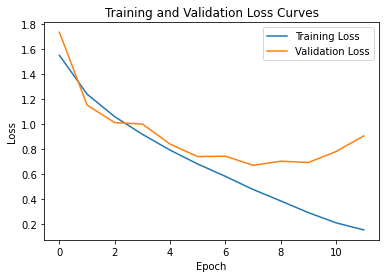

Testing with learning rate: 0.005, decay factor: 0.5
Epoch [1/30], Step [100/625], Loss: 1.6550
Epoch [1/30], Step [200/625], Loss: 1.8032
Epoch [1/30], Step [300/625], Loss: 1.5683
Epoch [1/30], Step [400/625], Loss: 1.4842
Epoch [1/30], Step [500/625], Loss: 1.4169
Epoch [1/30], Step [600/625], Loss: 1.1913
Validation Loss: 2.1426, Accuracy on Val_data: 37.16%
Validation loss decreased (inf --> 2.142566). Saving model...
Epoch :1, Train Loss: 1.5581, Validation Loss: 2.1426
Epoch [2/30], Step [100/625], Loss: 1.3587
Epoch [2/30], Step [200/625], Loss: 1.2813
Epoch [2/30], Step [300/625], Loss: 1.4295
Epoch [2/30], Step [400/625], Loss: 1.2416
Epoch [2/30], Step [500/625], Loss: 1.0505
Epoch [2/30], Step [600/625], Loss: 0.9787
Validation Loss: 1.1229, Accuracy on Val_data: 58.22%
Validation loss decreased (2.142566 --> 1.122862). Saving model...
Epoch :2, Train Loss: 1.2598, Validation Loss: 1.1229
Epoch [3/30], Step [100/625], Loss: 1.3564
Epoch [3/30], Step [200/625], Loss: 1.1476


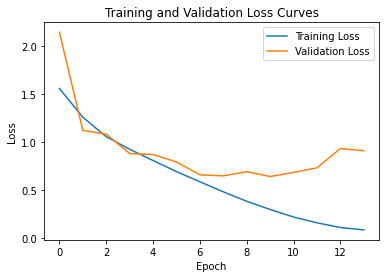

Testing with learning rate: 0.005, decay factor: 0.7
Epoch [1/30], Step [100/625], Loss: 1.9320
Epoch [1/30], Step [200/625], Loss: 1.9050
Epoch [1/30], Step [300/625], Loss: 1.4847
Epoch [1/30], Step [400/625], Loss: 1.6163
Epoch [1/30], Step [500/625], Loss: 1.3782
Epoch [1/30], Step [600/625], Loss: 1.4956
Validation Loss: 1.6577, Accuracy on Val_data: 41.01%
Validation loss decreased (inf --> 1.657686). Saving model...
Epoch :1, Train Loss: 1.5682, Validation Loss: 1.6577
Epoch [2/30], Step [100/625], Loss: 1.4470
Epoch [2/30], Step [200/625], Loss: 1.2946
Epoch [2/30], Step [300/625], Loss: 1.2806
Epoch [2/30], Step [400/625], Loss: 1.1084
Epoch [2/30], Step [500/625], Loss: 0.8855
Epoch [2/30], Step [600/625], Loss: 1.1903
Validation Loss: 1.1446, Accuracy on Val_data: 58.98%
Validation loss decreased (1.657686 --> 1.144595). Saving model...
Epoch :2, Train Loss: 1.2673, Validation Loss: 1.1446
Epoch [3/30], Step [100/625], Loss: 1.2935
Epoch [3/30], Step [200/625], Loss: 0.8394


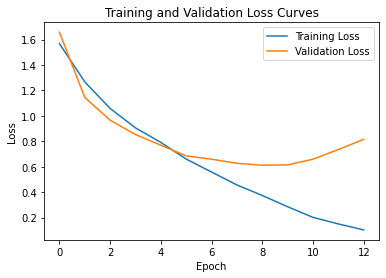

Testing with learning rate: 0.001, decay factor: 0.3
Epoch [1/30], Step [100/625], Loss: 1.4920
Epoch [1/30], Step [200/625], Loss: 1.5383
Epoch [1/30], Step [300/625], Loss: 1.2196
Epoch [1/30], Step [400/625], Loss: 1.1301
Epoch [1/30], Step [500/625], Loss: 1.0177
Epoch [1/30], Step [600/625], Loss: 1.2656
Validation Loss: 1.1326, Accuracy on Val_data: 59.26%
Validation loss decreased (inf --> 1.132645). Saving model...
Epoch :1, Train Loss: 1.3415, Validation Loss: 1.1326
Epoch [2/30], Step [100/625], Loss: 1.2349
Epoch [2/30], Step [200/625], Loss: 1.1742
Epoch [2/30], Step [300/625], Loss: 0.8183
Epoch [2/30], Step [400/625], Loss: 0.7155
Epoch [2/30], Step [500/625], Loss: 0.8947
Epoch [2/30], Step [600/625], Loss: 0.7344
Validation Loss: 0.8927, Accuracy on Val_data: 67.72%
Validation loss decreased (1.132645 --> 0.892705). Saving model...
Epoch :2, Train Loss: 1.0071, Validation Loss: 0.8927
Epoch [3/30], Step [100/625], Loss: 0.8897
Epoch [3/30], Step [200/625], Loss: 0.7983


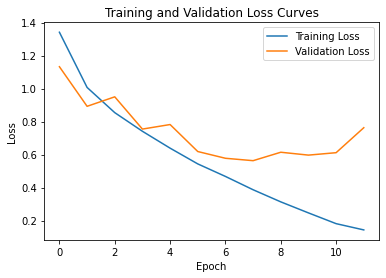

Testing with learning rate: 0.001, decay factor: 0.5
Epoch [1/30], Step [100/625], Loss: 1.5884
Epoch [1/30], Step [200/625], Loss: 1.2973
Epoch [1/30], Step [300/625], Loss: 1.3478
Epoch [1/30], Step [400/625], Loss: 1.0599
Epoch [1/30], Step [500/625], Loss: 0.9519
Epoch [1/30], Step [600/625], Loss: 1.1110
Validation Loss: 1.2435, Accuracy on Val_data: 56.25%
Validation loss decreased (inf --> 1.243461). Saving model...
Epoch :1, Train Loss: 1.3495, Validation Loss: 1.2435
Epoch [2/30], Step [100/625], Loss: 0.8935
Epoch [2/30], Step [200/625], Loss: 1.1115
Epoch [2/30], Step [300/625], Loss: 0.8906
Epoch [2/30], Step [400/625], Loss: 1.1850
Epoch [2/30], Step [500/625], Loss: 1.0675
Epoch [2/30], Step [600/625], Loss: 0.9485
Validation Loss: 0.9845, Accuracy on Val_data: 65.30%
Validation loss decreased (1.243461 --> 0.984452). Saving model...
Epoch :2, Train Loss: 1.0145, Validation Loss: 0.9845
Epoch [3/30], Step [100/625], Loss: 0.8057
Epoch [3/30], Step [200/625], Loss: 0.8474


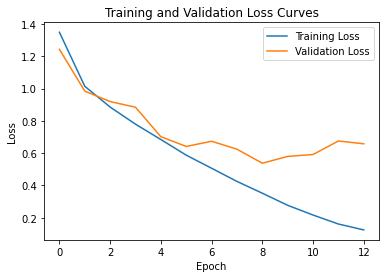

Testing with learning rate: 0.001, decay factor: 0.7
Epoch [1/30], Step [100/625], Loss: 1.6010
Epoch [1/30], Step [200/625], Loss: 1.4580
Epoch [1/30], Step [300/625], Loss: 1.3151
Epoch [1/30], Step [400/625], Loss: 1.2652
Epoch [1/30], Step [500/625], Loss: 1.1456
Epoch [1/30], Step [600/625], Loss: 1.0296
Validation Loss: 1.1651, Accuracy on Val_data: 58.70%
Validation loss decreased (inf --> 1.165076). Saving model...
Epoch :1, Train Loss: 1.3184, Validation Loss: 1.1651
Epoch [2/30], Step [100/625], Loss: 0.7272
Epoch [2/30], Step [200/625], Loss: 1.0979
Epoch [2/30], Step [300/625], Loss: 1.2553
Epoch [2/30], Step [400/625], Loss: 1.0376
Epoch [2/30], Step [500/625], Loss: 0.8724
Epoch [2/30], Step [600/625], Loss: 0.9607
Validation Loss: 0.9149, Accuracy on Val_data: 66.35%
Validation loss decreased (1.165076 --> 0.914901). Saving model...
Epoch :2, Train Loss: 0.9757, Validation Loss: 0.9149
Epoch [3/30], Step [100/625], Loss: 0.8594
Epoch [3/30], Step [200/625], Loss: 0.7820


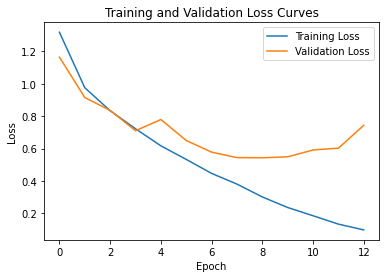

Testing with learning rate: 0.0005, decay factor: 0.3
Epoch [1/30], Step [100/625], Loss: 1.4252
Epoch [1/30], Step [200/625], Loss: 1.3577
Epoch [1/30], Step [300/625], Loss: 1.1835
Epoch [1/30], Step [400/625], Loss: 1.2803
Epoch [1/30], Step [500/625], Loss: 1.0616
Epoch [1/30], Step [600/625], Loss: 0.9160
Validation Loss: 1.1292, Accuracy on Val_data: 59.98%
Validation loss decreased (inf --> 1.129173). Saving model...
Epoch :1, Train Loss: 1.3211, Validation Loss: 1.1292
Epoch [2/30], Step [100/625], Loss: 1.0517
Epoch [2/30], Step [200/625], Loss: 0.9234
Epoch [2/30], Step [300/625], Loss: 1.0465
Epoch [2/30], Step [400/625], Loss: 0.7729
Epoch [2/30], Step [500/625], Loss: 0.9330
Epoch [2/30], Step [600/625], Loss: 0.8330
Validation Loss: 1.0177, Accuracy on Val_data: 62.76%
Validation loss decreased (1.129173 --> 1.017693). Saving model...
Epoch :2, Train Loss: 1.0226, Validation Loss: 1.0177
Epoch [3/30], Step [100/625], Loss: 0.7044
Epoch [3/30], Step [200/625], Loss: 0.8669

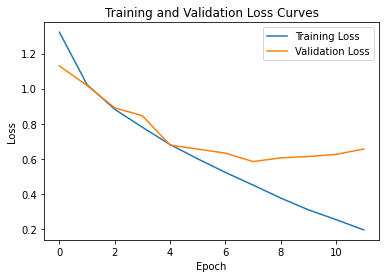

Testing with learning rate: 0.0005, decay factor: 0.5
Epoch [1/30], Step [100/625], Loss: 1.6380
Epoch [1/30], Step [200/625], Loss: 1.3270
Epoch [1/30], Step [300/625], Loss: 1.1362
Epoch [1/30], Step [400/625], Loss: 1.2705
Epoch [1/30], Step [500/625], Loss: 1.0904
Epoch [1/30], Step [600/625], Loss: 1.0676
Validation Loss: 1.1833, Accuracy on Val_data: 58.43%
Validation loss decreased (inf --> 1.183327). Saving model...
Epoch :1, Train Loss: 1.2941, Validation Loss: 1.1833
Epoch [2/30], Step [100/625], Loss: 0.8205
Epoch [2/30], Step [200/625], Loss: 1.0493
Epoch [2/30], Step [300/625], Loss: 0.9448
Epoch [2/30], Step [400/625], Loss: 0.8708
Epoch [2/30], Step [500/625], Loss: 1.0807
Epoch [2/30], Step [600/625], Loss: 0.9257
Validation Loss: 0.8816, Accuracy on Val_data: 68.56%
Validation loss decreased (1.183327 --> 0.881623). Saving model...
Epoch :2, Train Loss: 0.9871, Validation Loss: 0.8816
Epoch [3/30], Step [100/625], Loss: 0.8832
Epoch [3/30], Step [200/625], Loss: 0.8276

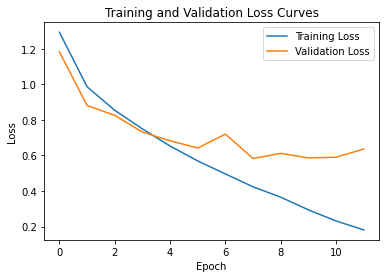

Testing with learning rate: 0.0005, decay factor: 0.7
Epoch [1/30], Step [100/625], Loss: 1.4053
Epoch [1/30], Step [200/625], Loss: 1.4033
Epoch [1/30], Step [300/625], Loss: 1.5900
Epoch [1/30], Step [400/625], Loss: 1.2146
Epoch [1/30], Step [500/625], Loss: 1.3055
Epoch [1/30], Step [600/625], Loss: 0.9805
Validation Loss: 1.1721, Accuracy on Val_data: 58.19%
Validation loss decreased (inf --> 1.172050). Saving model...
Epoch :1, Train Loss: 1.2982, Validation Loss: 1.1721
Epoch [2/30], Step [100/625], Loss: 1.0787
Epoch [2/30], Step [200/625], Loss: 0.9610
Epoch [2/30], Step [300/625], Loss: 1.0038
Epoch [2/30], Step [400/625], Loss: 0.9132
Epoch [2/30], Step [500/625], Loss: 1.0767
Epoch [2/30], Step [600/625], Loss: 1.0623
Validation Loss: 0.9028, Accuracy on Val_data: 67.59%
Validation loss decreased (1.172050 --> 0.902789). Saving model...
Epoch :2, Train Loss: 0.9864, Validation Loss: 0.9028
Epoch [3/30], Step [100/625], Loss: 0.8131
Epoch [3/30], Step [200/625], Loss: 0.8534

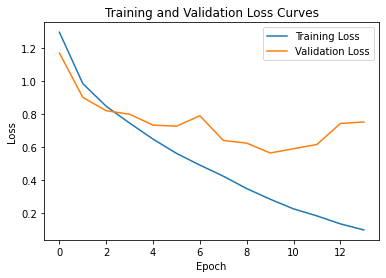

Testing with learning rate: 0.0001, decay factor: 0.3
Epoch [1/30], Step [100/625], Loss: 1.4294
Epoch [1/30], Step [200/625], Loss: 1.6351
Epoch [1/30], Step [300/625], Loss: 1.3979
Epoch [1/30], Step [400/625], Loss: 1.4120
Epoch [1/30], Step [500/625], Loss: 1.4344
Epoch [1/30], Step [600/625], Loss: 1.3372
Validation Loss: 1.2484, Accuracy on Val_data: 54.47%
Validation loss decreased (inf --> 1.248418). Saving model...
Epoch :1, Train Loss: 1.4786, Validation Loss: 1.2484
Epoch [2/30], Step [100/625], Loss: 1.3392
Epoch [2/30], Step [200/625], Loss: 1.2503
Epoch [2/30], Step [300/625], Loss: 1.0114
Epoch [2/30], Step [400/625], Loss: 1.2093
Epoch [2/30], Step [500/625], Loss: 0.9936
Epoch [2/30], Step [600/625], Loss: 1.2386
Validation Loss: 1.2631, Accuracy on Val_data: 55.88%
Epoch :2, Train Loss: 1.1882, Validation Loss: 1.2631
Epoch [3/30], Step [100/625], Loss: 1.2923
Epoch [3/30], Step [200/625], Loss: 1.1174
Epoch [3/30], Step [300/625], Loss: 1.0862
Epoch [3/30], Step [400

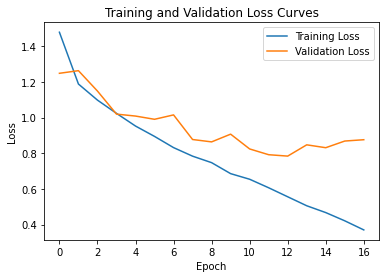

Testing with learning rate: 0.0001, decay factor: 0.5
Epoch [1/30], Step [100/625], Loss: 1.8026
Epoch [1/30], Step [200/625], Loss: 1.7659
Epoch [1/30], Step [300/625], Loss: 1.5748
Epoch [1/30], Step [400/625], Loss: 1.3053
Epoch [1/30], Step [500/625], Loss: 1.2268
Epoch [1/30], Step [600/625], Loss: 1.2998
Validation Loss: 1.2343, Accuracy on Val_data: 55.56%
Validation loss decreased (inf --> 1.234295). Saving model...
Epoch :1, Train Loss: 1.4730, Validation Loss: 1.2343
Epoch [2/30], Step [100/625], Loss: 1.4327
Epoch [2/30], Step [200/625], Loss: 0.8892
Epoch [2/30], Step [300/625], Loss: 1.1487
Epoch [2/30], Step [400/625], Loss: 1.0489
Epoch [2/30], Step [500/625], Loss: 1.2872
Epoch [2/30], Step [600/625], Loss: 1.2505
Validation Loss: 1.2007, Accuracy on Val_data: 57.37%
Validation loss decreased (1.234295 --> 1.200691). Saving model...
Epoch :2, Train Loss: 1.1809, Validation Loss: 1.2007
Epoch [3/30], Step [100/625], Loss: 1.0036
Epoch [3/30], Step [200/625], Loss: 1.2558

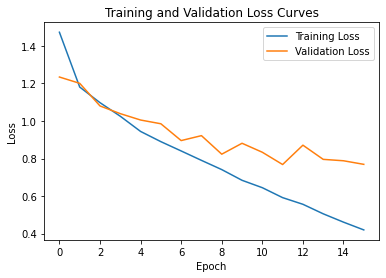

Testing with learning rate: 0.0001, decay factor: 0.7
Epoch [1/30], Step [100/625], Loss: 1.6167
Epoch [1/30], Step [200/625], Loss: 1.3345
Epoch [1/30], Step [300/625], Loss: 1.3329
Epoch [1/30], Step [400/625], Loss: 1.4387
Epoch [1/30], Step [500/625], Loss: 1.2118
Epoch [1/30], Step [600/625], Loss: 1.1528
Validation Loss: 1.3324, Accuracy on Val_data: 51.50%
Validation loss decreased (inf --> 1.332420). Saving model...
Epoch :1, Train Loss: 1.4694, Validation Loss: 1.3324
Epoch [2/30], Step [100/625], Loss: 1.0196
Epoch [2/30], Step [200/625], Loss: 1.1565
Epoch [2/30], Step [300/625], Loss: 1.2043
Epoch [2/30], Step [400/625], Loss: 1.0542
Epoch [2/30], Step [500/625], Loss: 1.1347
Epoch [2/30], Step [600/625], Loss: 1.1637
Validation Loss: 1.2052, Accuracy on Val_data: 56.60%
Validation loss decreased (1.332420 --> 1.205232). Saving model...
Epoch :2, Train Loss: 1.1825, Validation Loss: 1.2052
Epoch [3/30], Step [100/625], Loss: 1.2869
Epoch [3/30], Step [200/625], Loss: 1.1220

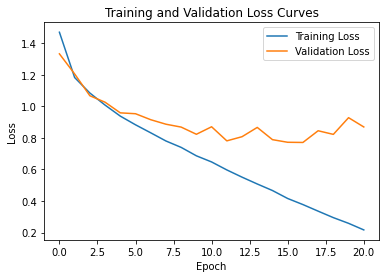

In [10]:
#1
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import matplotlib.pyplot as plt
#from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
#from torch.utils.data import DataLoader

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 128, kernel_size=5, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(128)
        self.layer1 = self.make_layer(128, 64, 2)
        self.layer2 = self.make_layer(64, 128, 2, stride=2)
        self.layer3 = self.make_layer(128, 256, 2, stride=2)
        self.dropout = nn.Dropout(0.2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(ResidualBlock(in_channels, out_channels, stride))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x
    
    
learning_rates = [0.005, 0.001, 0.0005, 0.0001]  # 不同的学习率
decay_factors = [0.3, 0.5, 0.7]  # 不同的衰减因子

for lr in learning_rates:
    for decay_factor in decay_factors:
        print(f"Testing with learning rate: {lr}, decay factor: {decay_factor}")

        # 初始化模型、优化器和学习率调度器
        model = ResNet()
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)

        # Prepare your data loaders
        train_loader, val_loader, test_loader = prepare_data(36)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adamax(model.parameters(), lr=lr)
        #scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.3)  # Learning rate scheduler
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=decay_factor, patience=5)

        train_losses = []
        val_losses = []  # Validation set loss
        best_val_loss = float('inf')
        patience = 4  # Number of epochs to wait if no improvement
        wait = 0

        # Training loop with model checkpointing and early stopping
        num_epochs = 30
        for epoch in range(num_epochs):
            running_loss = 0.0
            for i, (images, labels) in enumerate(train_loader):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                running_loss += loss.item()

                if (i + 1) % 100 == 0:
                    print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                          .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

            # Average loss for the current epoch
            epoch_loss = running_loss / len(train_loader)
            train_losses.append(epoch_loss)

            # Validation
            val_loss = validate_model(val_loader, model, criterion)
            val_losses.append(val_loss)

            # Model checkpoint: save the model if validation loss has decreased
            if val_loss < best_val_loss:
                print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
                torch.save(model.state_dict(), "best_model.pth")
                best_val_loss = val_loss
                wait = 0
            else:
                wait += 1
                if wait >= patience:
                    print(f"No improvement for {patience} epochs, stopping early.")
                    break

            # Learning rate scheduling
            scheduler.step(val_loss)


            print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
                  .format(epoch + 1, epoch_loss, val_loss))

        # Plotting the loss curves
        plt.plot(train_losses, label='Training Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss Curves')
        plt.legend()
        plt.show()

        # Testing the final model
        #test_model(test_loader, model, criterion)


Testing with learning rate: 0.005, decay factor: 0.3
Epoch [1/30], Step [100/625], Loss: 1.7787
Epoch [1/30], Step [200/625], Loss: 1.7647
Epoch [1/30], Step [300/625], Loss: 1.2863
Epoch [1/30], Step [400/625], Loss: 1.2724
Epoch [1/30], Step [500/625], Loss: 1.3816
Epoch [1/30], Step [600/625], Loss: 1.4411
Validation Loss: 1.6266, Accuracy on Val_data: 43.96%
Validation loss decreased (inf --> 1.626573). Saving model...
Epoch :1, Train Loss: 1.5104, Validation Loss: 1.6266
Epoch [2/30], Step [100/625], Loss: 1.0746
Epoch [2/30], Step [200/625], Loss: 1.0414
Epoch [2/30], Step [300/625], Loss: 1.1335
Epoch [2/30], Step [400/625], Loss: 1.0333
Epoch [2/30], Step [500/625], Loss: 1.0911
Epoch [2/30], Step [600/625], Loss: 1.3407
Validation Loss: 1.0917, Accuracy on Val_data: 61.22%
Validation loss decreased (1.626573 --> 1.091681). Saving model...
Epoch :2, Train Loss: 1.1902, Validation Loss: 1.0917
Epoch [3/30], Step [100/625], Loss: 1.0996
Epoch [3/30], Step [200/625], Loss: 0.9134


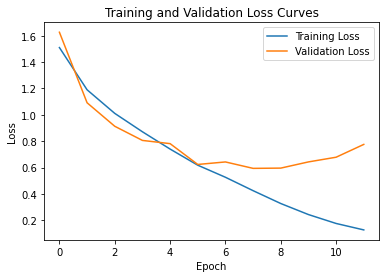

Average Test Loss: 0.8095, Accuracy on Test Set: 80.19%
Testing with learning rate: 0.005, decay factor: 0.5
Epoch [1/30], Step [100/625], Loss: 1.8885
Epoch [1/30], Step [200/625], Loss: 1.6728
Epoch [1/30], Step [300/625], Loss: 1.5817
Epoch [1/30], Step [400/625], Loss: 1.5046
Epoch [1/30], Step [500/625], Loss: 1.5643
Epoch [1/30], Step [600/625], Loss: 1.0736
Validation Loss: 2.6263, Accuracy on Val_data: 29.56%
Validation loss decreased (inf --> 2.626284). Saving model...
Epoch :1, Train Loss: 1.5818, Validation Loss: 2.6263
Epoch [2/30], Step [100/625], Loss: 1.4547
Epoch [2/30], Step [200/625], Loss: 1.4100
Epoch [2/30], Step [300/625], Loss: 0.9976
Epoch [2/30], Step [400/625], Loss: 1.2486
Epoch [2/30], Step [500/625], Loss: 1.3324
Epoch [2/30], Step [600/625], Loss: 1.1713
Validation Loss: 1.1328, Accuracy on Val_data: 58.93%
Validation loss decreased (2.626284 --> 1.132807). Saving model...
Epoch :2, Train Loss: 1.2769, Validation Loss: 1.1328
Epoch [3/30], Step [100/625], 

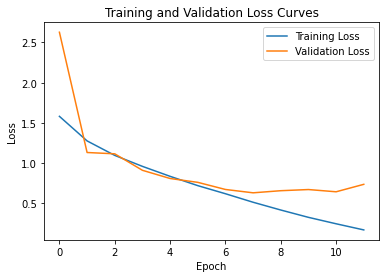

Average Test Loss: 0.7333, Accuracy on Test Set: 79.24%
Testing with learning rate: 0.005, decay factor: 0.7
Epoch [1/30], Step [100/625], Loss: 1.7497
Epoch [1/30], Step [200/625], Loss: 1.6958
Epoch [1/30], Step [300/625], Loss: 1.6332
Epoch [1/30], Step [400/625], Loss: 1.4980
Epoch [1/30], Step [500/625], Loss: 1.2321
Epoch [1/30], Step [600/625], Loss: 1.2173
Validation Loss: 2.1193, Accuracy on Val_data: 36.04%
Validation loss decreased (inf --> 2.119294). Saving model...
Epoch :1, Train Loss: 1.5833, Validation Loss: 2.1193
Epoch [2/30], Step [100/625], Loss: 1.3219
Epoch [2/30], Step [200/625], Loss: 1.0860
Epoch [2/30], Step [300/625], Loss: 1.2260
Epoch [2/30], Step [400/625], Loss: 1.2953
Epoch [2/30], Step [500/625], Loss: 1.1857
Epoch [2/30], Step [600/625], Loss: 1.3975
Validation Loss: 1.1767, Accuracy on Val_data: 57.39%
Validation loss decreased (2.119294 --> 1.176683). Saving model...
Epoch :2, Train Loss: 1.2803, Validation Loss: 1.1767
Epoch [3/30], Step [100/625], 

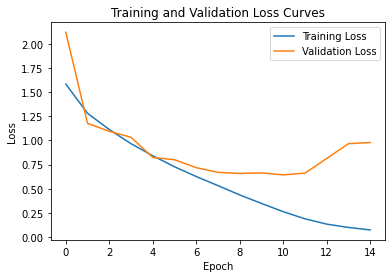

Average Test Loss: 0.9789, Accuracy on Test Set: 80.12%
Testing with learning rate: 0.001, decay factor: 0.3
Epoch [1/30], Step [100/625], Loss: 1.6744
Epoch [1/30], Step [200/625], Loss: 1.6966
Epoch [1/30], Step [300/625], Loss: 1.3781
Epoch [1/30], Step [400/625], Loss: 1.0068
Epoch [1/30], Step [500/625], Loss: 1.1670
Epoch [1/30], Step [600/625], Loss: 0.9918
Validation Loss: 1.4438, Accuracy on Val_data: 51.35%
Validation loss decreased (inf --> 1.443771). Saving model...
Epoch :1, Train Loss: 1.3323, Validation Loss: 1.4438
Epoch [2/30], Step [100/625], Loss: 1.1665
Epoch [2/30], Step [200/625], Loss: 0.9417
Epoch [2/30], Step [300/625], Loss: 1.0631
Epoch [2/30], Step [400/625], Loss: 0.9147
Epoch [2/30], Step [500/625], Loss: 0.9182
Epoch [2/30], Step [600/625], Loss: 0.9948
Validation Loss: 0.9182, Accuracy on Val_data: 66.46%
Validation loss decreased (1.443771 --> 0.918236). Saving model...
Epoch :2, Train Loss: 1.0203, Validation Loss: 0.9182
Epoch [3/30], Step [100/625], 

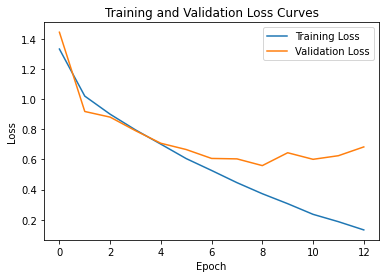

Average Test Loss: 0.6903, Accuracy on Test Set: 82.37%
Testing with learning rate: 0.001, decay factor: 0.5
Epoch [1/30], Step [100/625], Loss: 1.6708
Epoch [1/30], Step [200/625], Loss: 1.4439
Epoch [1/30], Step [300/625], Loss: 1.4140
Epoch [1/30], Step [400/625], Loss: 1.0605
Epoch [1/30], Step [500/625], Loss: 1.0746
Epoch [1/30], Step [600/625], Loss: 0.8942
Validation Loss: 1.1496, Accuracy on Val_data: 57.52%
Validation loss decreased (inf --> 1.149591). Saving model...
Epoch :1, Train Loss: 1.3529, Validation Loss: 1.1496
Epoch [2/30], Step [100/625], Loss: 1.0590
Epoch [2/30], Step [200/625], Loss: 0.9685
Epoch [2/30], Step [300/625], Loss: 0.9242
Epoch [2/30], Step [400/625], Loss: 1.0425
Epoch [2/30], Step [500/625], Loss: 1.2849
Epoch [2/30], Step [600/625], Loss: 0.8805
Validation Loss: 0.9370, Accuracy on Val_data: 66.25%
Validation loss decreased (1.149591 --> 0.936951). Saving model...
Epoch :2, Train Loss: 1.0277, Validation Loss: 0.9370
Epoch [3/30], Step [100/625], 

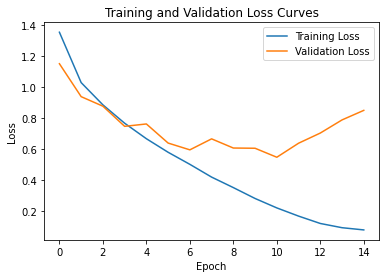

Average Test Loss: 0.8718, Accuracy on Test Set: 82.32%
Testing with learning rate: 0.001, decay factor: 0.7
Epoch [1/30], Step [100/625], Loss: 1.5737
Epoch [1/30], Step [200/625], Loss: 1.4980
Epoch [1/30], Step [300/625], Loss: 1.6314
Epoch [1/30], Step [400/625], Loss: 1.1999
Epoch [1/30], Step [500/625], Loss: 1.1579
Epoch [1/30], Step [600/625], Loss: 1.1968
Validation Loss: 1.3811, Accuracy on Val_data: 52.64%
Validation loss decreased (inf --> 1.381107). Saving model...
Epoch :1, Train Loss: 1.3885, Validation Loss: 1.3811
Epoch [2/30], Step [100/625], Loss: 1.0452
Epoch [2/30], Step [200/625], Loss: 1.1524
Epoch [2/30], Step [300/625], Loss: 1.3953
Epoch [2/30], Step [400/625], Loss: 0.9955
Epoch [2/30], Step [500/625], Loss: 1.0217
Epoch [2/30], Step [600/625], Loss: 0.8261
Validation Loss: 0.9486, Accuracy on Val_data: 65.58%
Validation loss decreased (1.381107 --> 0.948644). Saving model...
Epoch :2, Train Loss: 1.0453, Validation Loss: 0.9486
Epoch [3/30], Step [100/625], 

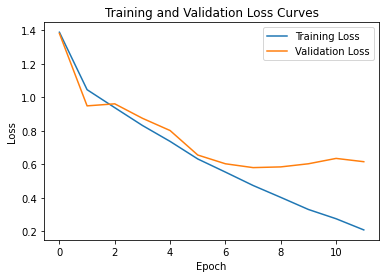

Average Test Loss: 0.6248, Accuracy on Test Set: 82.51%
Testing with learning rate: 0.0005, decay factor: 0.3
Epoch [1/30], Step [100/625], Loss: 1.7591
Epoch [1/30], Step [200/625], Loss: 1.4168
Epoch [1/30], Step [300/625], Loss: 1.3475
Epoch [1/30], Step [400/625], Loss: 1.0364
Epoch [1/30], Step [500/625], Loss: 0.9077
Epoch [1/30], Step [600/625], Loss: 1.0424
Validation Loss: 1.2098, Accuracy on Val_data: 57.94%
Validation loss decreased (inf --> 1.209788). Saving model...
Epoch :1, Train Loss: 1.2963, Validation Loss: 1.2098
Epoch [2/30], Step [100/625], Loss: 0.9404
Epoch [2/30], Step [200/625], Loss: 1.0551
Epoch [2/30], Step [300/625], Loss: 1.1394
Epoch [2/30], Step [400/625], Loss: 0.9685
Epoch [2/30], Step [500/625], Loss: 1.0331
Epoch [2/30], Step [600/625], Loss: 0.9768
Validation Loss: 0.9845, Accuracy on Val_data: 65.30%
Validation loss decreased (1.209788 --> 0.984457). Saving model...
Epoch :2, Train Loss: 0.9973, Validation Loss: 0.9845
Epoch [3/30], Step [100/625],

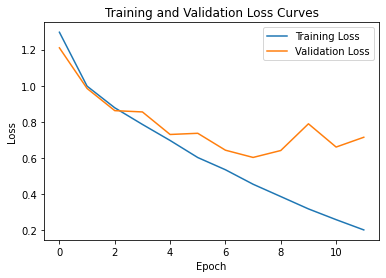

Average Test Loss: 0.7039, Accuracy on Test Set: 79.64%
Testing with learning rate: 0.0005, decay factor: 0.5
Epoch [1/30], Step [100/625], Loss: 1.7018
Epoch [1/30], Step [200/625], Loss: 1.3560
Epoch [1/30], Step [300/625], Loss: 1.4489
Epoch [1/30], Step [400/625], Loss: 1.6463
Epoch [1/30], Step [500/625], Loss: 1.1849
Epoch [1/30], Step [600/625], Loss: 0.9041
Validation Loss: 1.1692, Accuracy on Val_data: 58.14%
Validation loss decreased (inf --> 1.169200). Saving model...
Epoch :1, Train Loss: 1.3236, Validation Loss: 1.1692
Epoch [2/30], Step [100/625], Loss: 0.9928
Epoch [2/30], Step [200/625], Loss: 0.9795
Epoch [2/30], Step [300/625], Loss: 0.9214
Epoch [2/30], Step [400/625], Loss: 0.8271
Epoch [2/30], Step [500/625], Loss: 0.8901
Epoch [2/30], Step [600/625], Loss: 1.1809
Validation Loss: 0.9992, Accuracy on Val_data: 63.30%
Validation loss decreased (1.169200 --> 0.999158). Saving model...
Epoch :2, Train Loss: 1.0167, Validation Loss: 0.9992
Epoch [3/30], Step [100/625],

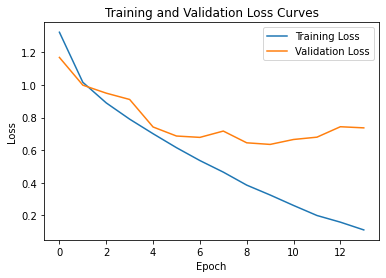

Average Test Loss: 0.7715, Accuracy on Test Set: 80.50%
Testing with learning rate: 0.0005, decay factor: 0.7
Epoch [1/30], Step [100/625], Loss: 1.6560
Epoch [1/30], Step [200/625], Loss: 1.4509
Epoch [1/30], Step [300/625], Loss: 1.2642
Epoch [1/30], Step [400/625], Loss: 0.9677
Epoch [1/30], Step [500/625], Loss: 1.0075
Epoch [1/30], Step [600/625], Loss: 0.9252
Validation Loss: 1.5009, Accuracy on Val_data: 49.71%
Validation loss decreased (inf --> 1.500890). Saving model...
Epoch :1, Train Loss: 1.2995, Validation Loss: 1.5009
Epoch [2/30], Step [100/625], Loss: 0.9135
Epoch [2/30], Step [200/625], Loss: 0.9938
Epoch [2/30], Step [300/625], Loss: 1.1994
Epoch [2/30], Step [400/625], Loss: 0.8068
Epoch [2/30], Step [500/625], Loss: 0.9147
Epoch [2/30], Step [600/625], Loss: 1.0758
Validation Loss: 0.9996, Accuracy on Val_data: 63.75%
Validation loss decreased (1.500890 --> 0.999607). Saving model...
Epoch :2, Train Loss: 0.9984, Validation Loss: 0.9996
Epoch [3/30], Step [100/625],

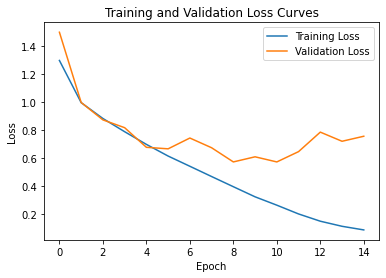

Average Test Loss: 0.8086, Accuracy on Test Set: 80.84%
Testing with learning rate: 0.0001, decay factor: 0.3
Epoch [1/30], Step [100/625], Loss: 1.6923
Epoch [1/30], Step [200/625], Loss: 1.6711
Epoch [1/30], Step [300/625], Loss: 1.5355
Epoch [1/30], Step [400/625], Loss: 1.5515
Epoch [1/30], Step [500/625], Loss: 1.3911
Epoch [1/30], Step [600/625], Loss: 1.3071
Validation Loss: 1.2507, Accuracy on Val_data: 55.27%
Validation loss decreased (inf --> 1.250669). Saving model...
Epoch :1, Train Loss: 1.4745, Validation Loss: 1.2507
Epoch [2/30], Step [100/625], Loss: 1.2695
Epoch [2/30], Step [200/625], Loss: 1.3303
Epoch [2/30], Step [300/625], Loss: 1.1362
Epoch [2/30], Step [400/625], Loss: 1.3385
Epoch [2/30], Step [500/625], Loss: 1.0540
Epoch [2/30], Step [600/625], Loss: 1.1366
Validation Loss: 1.1330, Accuracy on Val_data: 59.23%
Validation loss decreased (1.250669 --> 1.132990). Saving model...
Epoch :2, Train Loss: 1.1903, Validation Loss: 1.1330
Epoch [3/30], Step [100/625],

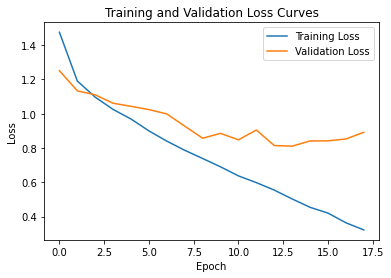

Average Test Loss: 0.8879, Accuracy on Test Set: 72.41%
Testing with learning rate: 0.0001, decay factor: 0.5
Epoch [1/30], Step [100/625], Loss: 1.7689
Epoch [1/30], Step [200/625], Loss: 1.5826
Epoch [1/30], Step [300/625], Loss: 1.4862
Epoch [1/30], Step [400/625], Loss: 1.1687
Epoch [1/30], Step [500/625], Loss: 1.3197
Epoch [1/30], Step [600/625], Loss: 1.3708
Validation Loss: 1.2687, Accuracy on Val_data: 54.34%
Validation loss decreased (inf --> 1.268744). Saving model...
Epoch :1, Train Loss: 1.4870, Validation Loss: 1.2687
Epoch [2/30], Step [100/625], Loss: 1.5214
Epoch [2/30], Step [200/625], Loss: 1.0824
Epoch [2/30], Step [300/625], Loss: 1.0991
Epoch [2/30], Step [400/625], Loss: 1.0532
Epoch [2/30], Step [500/625], Loss: 1.2958
Epoch [2/30], Step [600/625], Loss: 1.2432
Validation Loss: 1.1622, Accuracy on Val_data: 58.51%
Validation loss decreased (1.268744 --> 1.162218). Saving model...
Epoch :2, Train Loss: 1.1996, Validation Loss: 1.1622
Epoch [3/30], Step [100/625],

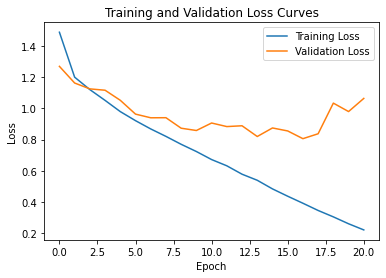

Average Test Loss: 1.0736, Accuracy on Test Set: 71.45%
Testing with learning rate: 0.0001, decay factor: 0.7
Epoch [1/30], Step [100/625], Loss: 1.7400
Epoch [1/30], Step [200/625], Loss: 1.5177
Epoch [1/30], Step [300/625], Loss: 1.4852
Epoch [1/30], Step [400/625], Loss: 1.5286
Epoch [1/30], Step [500/625], Loss: 1.1386
Epoch [1/30], Step [600/625], Loss: 1.1652
Validation Loss: 1.4010, Accuracy on Val_data: 50.63%
Validation loss decreased (inf --> 1.401025). Saving model...
Epoch :1, Train Loss: 1.4914, Validation Loss: 1.4010
Epoch [2/30], Step [100/625], Loss: 1.3782
Epoch [2/30], Step [200/625], Loss: 1.1414
Epoch [2/30], Step [300/625], Loss: 1.0888
Epoch [2/30], Step [400/625], Loss: 1.1209
Epoch [2/30], Step [500/625], Loss: 1.0179
Epoch [2/30], Step [600/625], Loss: 0.8949
Validation Loss: 1.2369, Accuracy on Val_data: 54.44%
Validation loss decreased (1.401025 --> 1.236946). Saving model...
Epoch :2, Train Loss: 1.2106, Validation Loss: 1.2369
Epoch [3/30], Step [100/625],

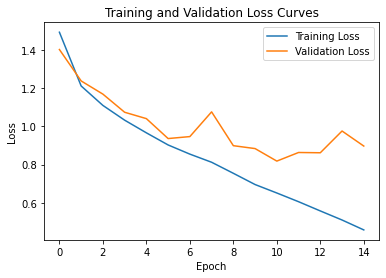

Average Test Loss: 0.8953, Accuracy on Test Set: 70.81%


In [7]:
#2
import torch.optim as optim


class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self.make_layer(64, 64, 2)
        self.layer2 = self.make_layer(64, 128, 2, stride=2)
        self.layer3 = self.make_layer(128, 256, 2, stride=2)
        self.dropout = nn.Dropout(0.2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(ResidualBlock(in_channels, out_channels, stride))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x
    
    
learning_rates = [0.005, 0.001, 0.0005, 0.0001]  # 不同的学习率
decay_factors = [0.3, 0.5, 0.7]  # 不同的衰减因子

for lr in learning_rates:
    for decay_factor in decay_factors:
        print(f"Testing with learning rate: {lr}, decay factor: {decay_factor}")

        # 初始化模型、优化器和学习率调度器
        model = ResNet()
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)

        # Prepare your data loaders
        train_loader, val_loader, test_loader = prepare_data(36)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adamax(model.parameters(), lr=lr)
        #scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.3)  # Learning rate scheduler
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=decay_factor, patience=5)

        train_losses = []
        val_losses = []  # Validation set loss
        best_val_loss = float('inf')
        patience = 4  # Number of epochs to wait if no improvement
        wait = 0

        # Training loop with model checkpointing and early stopping
        num_epochs = 30
        for epoch in range(num_epochs):
            running_loss = 0.0
            for i, (images, labels) in enumerate(train_loader):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                running_loss += loss.item()

                if (i + 1) % 100 == 0:
                    print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                          .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

            # Average loss for the current epoch
            epoch_loss = running_loss / len(train_loader)
            train_losses.append(epoch_loss)

            # Validation
            val_loss = validate_model(val_loader, model, criterion)
            val_losses.append(val_loss)

            # Model checkpoint: save the model if validation loss has decreased
            if val_loss < best_val_loss:
                print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
                torch.save(model.state_dict(), "best_model.pth")
                best_val_loss = val_loss
                wait = 0
            else:
                wait += 1
                if wait >= patience:
                    print(f"No improvement for {patience} epochs, stopping early.")
                    break

            # Learning rate scheduling
            scheduler.step(val_loss)


            print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
                  .format(epoch + 1, epoch_loss, val_loss))

        # Plotting the loss curves
        plt.plot(train_losses, label='Training Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss Curves')
        plt.legend()
        plt.show()

        # Testing the final model
        test_model(test_loader, model, criterion)


Epoch [1/30], Step [100/625], Loss: 2.0946
Epoch [1/30], Step [200/625], Loss: 2.0053
Epoch [1/30], Step [300/625], Loss: 1.9277
Epoch [1/30], Step [400/625], Loss: 1.9343
Epoch [1/30], Step [500/625], Loss: 1.8016
Epoch [1/30], Step [600/625], Loss: 1.7541
Validation Loss: 1.6049, Accuracy on Val_data: 39.34%
Validation loss decreased (inf --> 1.604858). Saving model...
Epoch :1, Train Loss: 1.8778, Validation Loss: 1.6049
Epoch [2/30], Step [100/625], Loss: 1.5244
Epoch [2/30], Step [200/625], Loss: 1.5408
Epoch [2/30], Step [300/625], Loss: 1.5509
Epoch [2/30], Step [400/625], Loss: 1.4455
Epoch [2/30], Step [500/625], Loss: 1.4982
Epoch [2/30], Step [600/625], Loss: 1.4670
Validation Loss: 1.4355, Accuracy on Val_data: 47.37%
Validation loss decreased (1.604858 --> 1.435499). Saving model...
Epoch :2, Train Loss: 1.5174, Validation Loss: 1.4355
Epoch [3/30], Step [100/625], Loss: 1.3775
Epoch [3/30], Step [200/625], Loss: 1.5993
Epoch [3/30], Step [300/625], Loss: 1.3731
Epoch [3/3

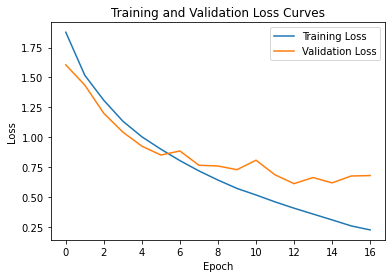

In [60]:
#内核为2，宽度64，残差块为2
#模板程序
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.shortcut = nn.Sequential()
        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False)
            )

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = self.conv2(out)
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=2, stride=1, padding=1, bias=False)
        self.layer1 = self.make_layer(64, 64, 2)
        self.layer2 = self.make_layer(64, 128, 2, stride=2)
        self.layer3 = self.make_layer(128, 256, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(ResidualBlock(in_channels, out_channels, stride))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


lr = 0.001
decay_factor = 0.5

model = ResNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader, val_loader, test_loader = prepare_data(36)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=decay_factor, patience=5)

train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 4
wait = 0

num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    val_loss = validate_model(val_loader, model, criterion)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
        torch.save(model.state_dict(), "best_model.pth")
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"No improvement for {patience} epochs, stopping early.")
            break

    scheduler.step(val_loss)

    print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch + 1, epoch_loss, val_loss))

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

#test_model(model, test_loader, criterion)

Epoch [1/30], Step [100/625], Loss: 2.1540
Epoch [1/30], Step [200/625], Loss: 1.8776
Epoch [1/30], Step [300/625], Loss: 1.9098
Epoch [1/30], Step [400/625], Loss: 1.6422
Epoch [1/30], Step [500/625], Loss: 1.6530
Epoch [1/30], Step [600/625], Loss: 1.6308
Validation Loss: 1.6687, Accuracy on Val_data: 36.18%
Validation loss decreased (inf --> 1.668685). Saving model...
Epoch :1, Train Loss: 1.8245, Validation Loss: 1.6687
Epoch [2/30], Step [100/625], Loss: 1.5686
Epoch [2/30], Step [200/625], Loss: 1.7487
Epoch [2/30], Step [300/625], Loss: 1.6335
Epoch [2/30], Step [400/625], Loss: 1.3832
Epoch [2/30], Step [500/625], Loss: 1.3378
Epoch [2/30], Step [600/625], Loss: 1.2266
Validation Loss: 1.4991, Accuracy on Val_data: 45.80%
Validation loss decreased (1.668685 --> 1.499116). Saving model...
Epoch :2, Train Loss: 1.5413, Validation Loss: 1.4991
Epoch [3/30], Step [100/625], Loss: 1.3022
Epoch [3/30], Step [200/625], Loss: 1.5445
Epoch [3/30], Step [300/625], Loss: 1.3800
Epoch [3/3

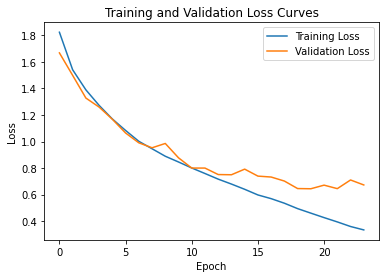

Average Test Loss: 0.6806, Accuracy on Test Set: 78.38%


In [45]:
#内核5，但是残差块1
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.shortcut = nn.Sequential()
        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False)
            )

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = self.conv2(out)
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=1, bias=False)
        self.layer1 = self.make_layer(64, 64, 1)
        self.layer2 = self.make_layer(64, 128, 1, stride=2)
        self.layer3 = self.make_layer(128, 256, 1, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(ResidualBlock(in_channels, out_channels, stride))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


lr = 0.001
decay_factor = 0.5

model = ResNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader, val_loader, test_loader = prepare_data(36)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=decay_factor, patience=5)

train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 4
wait = 0

num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    val_loss = validate_model(val_loader, model, criterion)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
        torch.save(model.state_dict(), "best_model.pth")
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"No improvement for {patience} epochs, stopping early.")
            break

    scheduler.step(val_loss)

    print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch + 1, epoch_loss, val_loss))

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()
test_model(test_loader, model, criterion)

Epoch [1/30], Step [100/625], Loss: 1.9964
Epoch [1/30], Step [200/625], Loss: 2.0321
Epoch [1/30], Step [300/625], Loss: 1.8609
Epoch [1/30], Step [400/625], Loss: 1.6742
Epoch [1/30], Step [500/625], Loss: 1.5403
Epoch [1/30], Step [600/625], Loss: 1.5536
Validation Loss: 1.6767, Accuracy on Val_data: 36.32%
Validation loss decreased (inf --> 1.676749). Saving model...
Epoch :1, Train Loss: 1.8265, Validation Loss: 1.6767
Epoch [2/30], Step [100/625], Loss: 1.5896
Epoch [2/30], Step [200/625], Loss: 1.4494
Epoch [2/30], Step [300/625], Loss: 1.6761
Epoch [2/30], Step [400/625], Loss: 1.5515
Epoch [2/30], Step [500/625], Loss: 1.5354
Epoch [2/30], Step [600/625], Loss: 1.4996
Validation Loss: 1.4574, Accuracy on Val_data: 46.22%
Validation loss decreased (1.676749 --> 1.457378). Saving model...
Epoch :2, Train Loss: 1.5618, Validation Loss: 1.4574
Epoch [3/30], Step [100/625], Loss: 1.3634
Epoch [3/30], Step [200/625], Loss: 1.2889
Epoch [3/30], Step [300/625], Loss: 1.2609
Epoch [3/3

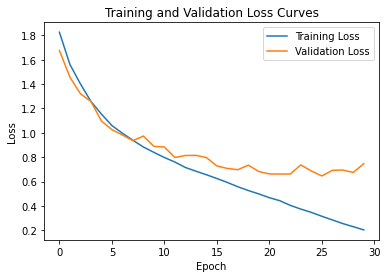

Average Test Loss: 0.7432, Accuracy on Test Set: 78.81%


In [46]:
#内核5，残差块为3
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.shortcut = nn.Sequential()
        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False)
            )

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = self.conv2(out)
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=1, bias=False)
        self.layer1 = self.make_layer(64, 64, 1)
        self.layer2 = self.make_layer(64, 128, 1, stride=2)
        self.layer3 = self.make_layer(128, 256, 1, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(ResidualBlock(in_channels, out_channels, stride))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


lr = 0.001
decay_factor = 0.5

model = ResNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader, val_loader, test_loader = prepare_data(36)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=decay_factor, patience=5)

train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 4
wait = 0

num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    val_loss = validate_model(val_loader, model, criterion)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
        torch.save(model.state_dict(), "best_model.pth")
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"No improvement for {patience} epochs, stopping early.")
            break

    scheduler.step(val_loss)

    print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch + 1, epoch_loss, val_loss))

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()
test_model(test_loader, model, criterion)

Epoch [1/30], Step [100/625], Loss: 1.4871
Epoch [1/30], Step [200/625], Loss: 1.3978
Epoch [1/30], Step [300/625], Loss: 1.1819
Epoch [1/30], Step [400/625], Loss: 1.2102
Epoch [1/30], Step [500/625], Loss: 1.3151
Epoch [1/30], Step [600/625], Loss: 1.2121
Validation Loss: 1.0280, Accuracy on Val_data: 62.96%
Validation loss decreased (inf --> 1.028010). Saving model...
Epoch :1, Train Loss: 1.3426, Validation Loss: 1.0280
Epoch [2/30], Step [100/625], Loss: 1.2157
Epoch [2/30], Step [200/625], Loss: 1.1342
Epoch [2/30], Step [300/625], Loss: 0.9464
Epoch [2/30], Step [400/625], Loss: 0.9213
Epoch [2/30], Step [500/625], Loss: 0.7504
Epoch [2/30], Step [600/625], Loss: 0.9516
Validation Loss: 0.9703, Accuracy on Val_data: 64.77%
Validation loss decreased (1.028010 --> 0.970305). Saving model...
Epoch :2, Train Loss: 1.0180, Validation Loss: 0.9703
Epoch [3/30], Step [100/625], Loss: 1.1303
Epoch [3/30], Step [200/625], Loss: 0.8768
Epoch [3/30], Step [300/625], Loss: 0.8470
Epoch [3/3

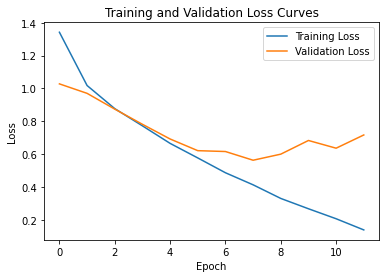

Average Test Loss: 0.7310, Accuracy on Test Set: 80.85%


In [48]:
#2
import torch.optim as optim
#标准程序


class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self.make_layer(64, 64, 2)
        self.layer2 = self.make_layer(64, 128, 2, stride=2)
        self.layer3 = self.make_layer(128, 256, 2, stride=2)
        self.dropout = nn.Dropout(0.2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(ResidualBlock(in_channels, out_channels, stride))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x
    
    
lr = 0.001
decay_factor =  0.5

model = ResNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader, val_loader, test_loader = prepare_data(36)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=lr)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.3)  # Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=decay_factor, patience=5)

train_losses = []
val_losses = [] 
best_val_loss = float('inf')
patience = 4  
wait = 0

num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    val_loss = validate_model(val_loader, model, criterion)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
        torch.save(model.state_dict(), "best_model.pth")
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"No improvement for {patience} epochs, stopping early.")
            break
    scheduler.step(val_loss)


    print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch + 1, epoch_loss, val_loss))

# Plotting the loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

#test_model(test_loader, model, criterion)


Epoch [1/30], Step [100/625], Loss: 1.4308
Epoch [1/30], Step [200/625], Loss: 1.3397
Epoch [1/30], Step [300/625], Loss: 1.4477
Epoch [1/30], Step [400/625], Loss: 1.2400
Epoch [1/30], Step [500/625], Loss: 1.2678
Epoch [1/30], Step [600/625], Loss: 1.0805
Validation Loss: 1.1980, Accuracy on Val_data: 57.27%
Validation loss decreased (inf --> 1.197952). Saving model...
Epoch :1, Train Loss: 1.3548, Validation Loss: 1.1980
Epoch [2/30], Step [100/625], Loss: 1.1033
Epoch [2/30], Step [200/625], Loss: 1.0427
Epoch [2/30], Step [300/625], Loss: 1.1770
Epoch [2/30], Step [400/625], Loss: 0.9870
Epoch [2/30], Step [500/625], Loss: 0.7944
Epoch [2/30], Step [600/625], Loss: 0.9526
Validation Loss: 1.0409, Accuracy on Val_data: 62.26%
Validation loss decreased (1.197952 --> 1.040922). Saving model...
Epoch :2, Train Loss: 1.0682, Validation Loss: 1.0409
Epoch [3/30], Step [100/625], Loss: 0.9769
Epoch [3/30], Step [200/625], Loss: 0.9070
Epoch [3/30], Step [300/625], Loss: 0.8104
Epoch [3/3

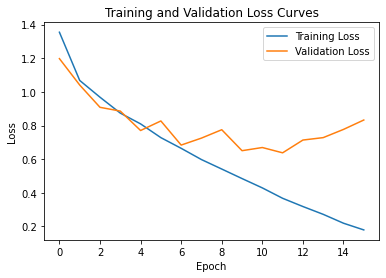

In [49]:
#3
import torch.optim as optim
#只有一个残差块


class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self.make_layer(64, 64, 1)
        self.layer2 = self.make_layer(64, 128, 1, stride=2)
        self.layer3 = self.make_layer(128, 256, 1, stride=2)
        self.dropout = nn.Dropout(0.2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(ResidualBlock(in_channels, out_channels, stride))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x
    
    
lr = 0.001
decay_factor =  0.5

model = ResNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader, val_loader, test_loader = prepare_data(36)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=lr)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.3)  # Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=decay_factor, patience=5)

train_losses = []
val_losses = [] 
best_val_loss = float('inf')
patience = 4  
wait = 0

num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    val_loss = validate_model(val_loader, model, criterion)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
        torch.save(model.state_dict(), "best_model.pth")
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"No improvement for {patience} epochs, stopping early.")
            break
    scheduler.step(val_loss)


    print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch + 1, epoch_loss, val_loss))

# Plotting the loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

#test_model(test_loader, model, criterion)


Epoch [1/30], Step [100/625], Loss: 1.5719
Epoch [1/30], Step [200/625], Loss: 1.4731
Epoch [1/30], Step [300/625], Loss: 1.2002
Epoch [1/30], Step [400/625], Loss: 1.3103
Epoch [1/30], Step [500/625], Loss: 1.4147
Epoch [1/30], Step [600/625], Loss: 0.9515
Validation Loss: 1.2042, Accuracy on Val_data: 56.96%
Validation loss decreased (inf --> 1.204239). Saving model...
Epoch :1, Train Loss: 1.3424, Validation Loss: 1.2042
Epoch [2/30], Step [100/625], Loss: 1.1509
Epoch [2/30], Step [200/625], Loss: 0.7182
Epoch [2/30], Step [300/625], Loss: 0.9672
Epoch [2/30], Step [400/625], Loss: 0.7648
Epoch [2/30], Step [500/625], Loss: 1.2423
Epoch [2/30], Step [600/625], Loss: 0.7723
Validation Loss: 0.8604, Accuracy on Val_data: 69.38%
Validation loss decreased (1.204239 --> 0.860351). Saving model...
Epoch :2, Train Loss: 0.9860, Validation Loss: 0.8604
Epoch [3/30], Step [100/625], Loss: 0.7308
Epoch [3/30], Step [200/625], Loss: 0.8852
Epoch [3/30], Step [300/625], Loss: 0.8965
Epoch [3/3

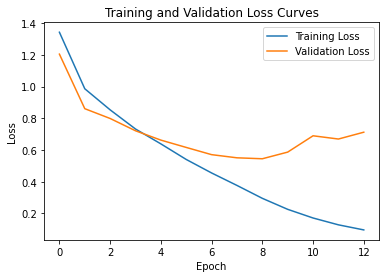

In [50]:
#4
import torch.optim as optim
#只有三个残差块


class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self.make_layer(64, 64, 3)
        self.layer2 = self.make_layer(64, 128, 3, stride=2)
        self.layer3 = self.make_layer(128, 256, 3, stride=2)
        self.dropout = nn.Dropout(0.2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(ResidualBlock(in_channels, out_channels, stride))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x
    
    
lr = 0.001
decay_factor =  0.5

model = ResNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader, val_loader, test_loader = prepare_data(36)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=lr)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.3)  # Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=decay_factor, patience=5)

train_losses = []
val_losses = [] 
best_val_loss = float('inf')
patience = 4  
wait = 0

num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    val_loss = validate_model(val_loader, model, criterion)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
        torch.save(model.state_dict(), "best_model.pth")
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"No improvement for {patience} epochs, stopping early.")
            break
    scheduler.step(val_loss)


    print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch + 1, epoch_loss, val_loss))

# Plotting the loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

#test_model(test_loader, model, criterion)


Epoch [1/30], Step [100/625], Loss: 1.5298
Epoch [1/30], Step [200/625], Loss: 1.4372
Epoch [1/30], Step [300/625], Loss: 1.2572
Epoch [1/30], Step [400/625], Loss: 0.9483
Epoch [1/30], Step [500/625], Loss: 1.2096
Epoch [1/30], Step [600/625], Loss: 1.1815
Validation Loss: 1.0027, Accuracy on Val_data: 64.08%
Validation loss decreased (inf --> 1.002737). Saving model...
Epoch :1, Train Loss: 1.3338, Validation Loss: 1.0027
Epoch [2/30], Step [100/625], Loss: 1.0194
Epoch [2/30], Step [200/625], Loss: 1.3484
Epoch [2/30], Step [300/625], Loss: 1.1045
Epoch [2/30], Step [400/625], Loss: 0.8768
Epoch [2/30], Step [500/625], Loss: 0.8708
Epoch [2/30], Step [600/625], Loss: 0.7913
Validation Loss: 0.8850, Accuracy on Val_data: 68.71%
Validation loss decreased (1.002737 --> 0.884953). Saving model...
Epoch :2, Train Loss: 0.9842, Validation Loss: 0.8850
Epoch [3/30], Step [100/625], Loss: 0.9027
Epoch [3/30], Step [200/625], Loss: 0.9340
Epoch [3/30], Step [300/625], Loss: 0.8988
Epoch [3/3

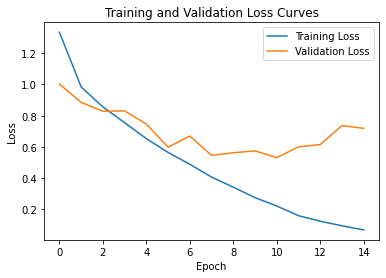

In [51]:
#5
import torch.optim as optim
#卷积内核大小为3，原来为5


class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self.make_layer(64, 64, 2)
        self.layer2 = self.make_layer(64, 128, 2, stride=2)
        self.layer3 = self.make_layer(128, 256, 2, stride=2)
        self.dropout = nn.Dropout(0.2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(ResidualBlock(in_channels, out_channels, stride))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x
    
    
lr = 0.001
decay_factor =  0.5

model = ResNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader, val_loader, test_loader = prepare_data(36)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=lr)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.3)  # Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=decay_factor, patience=5)

train_losses = []
val_losses = [] 
best_val_loss = float('inf')
patience = 4  
wait = 0

num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    val_loss = validate_model(val_loader, model, criterion)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
        torch.save(model.state_dict(), "best_model.pth")
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"No improvement for {patience} epochs, stopping early.")
            break
    scheduler.step(val_loss)


    print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch + 1, epoch_loss, val_loss))

# Plotting the loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

#test_model(test_loader, model, criterion)


Epoch [1/30], Step [100/625], Loss: 1.4309
Epoch [1/30], Step [200/625], Loss: 1.5284
Epoch [1/30], Step [300/625], Loss: 1.1479
Epoch [1/30], Step [400/625], Loss: 1.2807
Epoch [1/30], Step [500/625], Loss: 0.9637
Epoch [1/30], Step [600/625], Loss: 0.9984
Validation Loss: 1.2037, Accuracy on Val_data: 56.00%
Validation loss decreased (inf --> 1.203663). Saving model...
Epoch :1, Train Loss: 1.3122, Validation Loss: 1.2037
Epoch [2/30], Step [100/625], Loss: 1.2747
Epoch [2/30], Step [200/625], Loss: 0.9306
Epoch [2/30], Step [300/625], Loss: 0.8408
Epoch [2/30], Step [400/625], Loss: 0.9618
Epoch [2/30], Step [500/625], Loss: 1.3546
Epoch [2/30], Step [600/625], Loss: 0.8531
Validation Loss: 0.9577, Accuracy on Val_data: 66.91%
Validation loss decreased (1.203663 --> 0.957692). Saving model...
Epoch :2, Train Loss: 0.9688, Validation Loss: 0.9577
Epoch [3/30], Step [100/625], Loss: 0.9350
Epoch [3/30], Step [200/625], Loss: 0.9902
Epoch [3/30], Step [300/625], Loss: 0.8499
Epoch [3/3

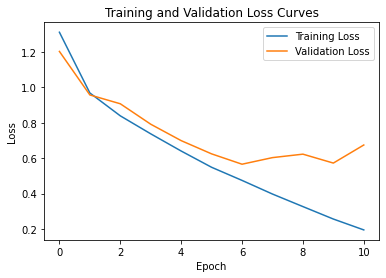

In [52]:
#6
import torch.optim as optim
#第一层的宽度改成128


class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 128, kernel_size=5, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(128)
        self.layer1 = self.make_layer(128, 64, 2)
        self.layer2 = self.make_layer(64, 128, 2, stride=2)
        self.layer3 = self.make_layer(128, 256, 2, stride=2)
        self.dropout = nn.Dropout(0.2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(ResidualBlock(in_channels, out_channels, stride))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x
    
    
lr = 0.001
decay_factor =  0.5

model = ResNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader, val_loader, test_loader = prepare_data(36)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=lr)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.3)  # Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=decay_factor, patience=5)

train_losses = []
val_losses = [] 
best_val_loss = float('inf')
patience = 4  
wait = 0

num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    val_loss = validate_model(val_loader, model, criterion)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
        torch.save(model.state_dict(), "best_model.pth")
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"No improvement for {patience} epochs, stopping early.")
            break
    scheduler.step(val_loss)


    print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch + 1, epoch_loss, val_loss))

# Plotting the loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

#test_model(test_loader, model, criterion)


Epoch [1/30], Step [100/625], Loss: 1.3949
Epoch [1/30], Step [200/625], Loss: 1.5419
Epoch [1/30], Step [300/625], Loss: 1.1929
Epoch [1/30], Step [400/625], Loss: 1.2027
Epoch [1/30], Step [500/625], Loss: 1.1888
Epoch [1/30], Step [600/625], Loss: 1.2309
Validation Loss: 1.6415, Accuracy on Val_data: 44.51%
Validation loss decreased (inf --> 1.641531). Saving model...
Epoch :1, Train Loss: 1.3314, Validation Loss: 1.6415
Epoch [2/30], Step [100/625], Loss: 1.1085
Epoch [2/30], Step [200/625], Loss: 0.9497
Epoch [2/30], Step [300/625], Loss: 1.2689
Epoch [2/30], Step [400/625], Loss: 0.8613
Epoch [2/30], Step [500/625], Loss: 0.9421
Epoch [2/30], Step [600/625], Loss: 1.0023
Validation Loss: 0.9888, Accuracy on Val_data: 65.11%
Validation loss decreased (1.641531 --> 0.988795). Saving model...
Epoch :2, Train Loss: 1.0349, Validation Loss: 0.9888
Epoch [3/30], Step [100/625], Loss: 1.0893
Epoch [3/30], Step [200/625], Loss: 0.8846
Epoch [3/30], Step [300/625], Loss: 0.8519
Epoch [3/3

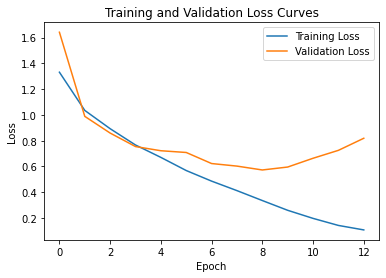

In [53]:
#7
import torch.optim as optim
#没有dropout


class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self.make_layer(64, 64, 2)
        self.layer2 = self.make_layer(64, 128, 2, stride=2)
        self.layer3 = self.make_layer(128, 256, 2, stride=2)
        #self.dropout = nn.Dropout(0.2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(ResidualBlock(in_channels, out_channels, stride))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        #x = self.dropout(x)
        x = self.fc(x)
        return x
    
    
lr = 0.001
decay_factor =  0.5

model = ResNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader, val_loader, test_loader = prepare_data(36)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=lr)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.3)  # Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=decay_factor, patience=5)

train_losses = []
val_losses = [] 
best_val_loss = float('inf')
patience = 4  
wait = 0

num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    val_loss = validate_model(val_loader, model, criterion)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
        torch.save(model.state_dict(), "best_model.pth")
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"No improvement for {patience} epochs, stopping early.")
            break
    scheduler.step(val_loss)


    print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch + 1, epoch_loss, val_loss))

# Plotting the loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

#test_model(test_loader, model, criterion)


Epoch [1/30], Step [100/625], Loss: 1.6091
Epoch [1/30], Step [200/625], Loss: 1.5283
Epoch [1/30], Step [300/625], Loss: 1.3847
Epoch [1/30], Step [400/625], Loss: 1.2428
Epoch [1/30], Step [500/625], Loss: 0.9522
Epoch [1/30], Step [600/625], Loss: 1.2135
Validation Loss: 1.4943, Accuracy on Val_data: 52.78%
Validation loss decreased (inf --> 1.494257). Saving model...
Epoch :1, Train Loss: 1.4143, Validation Loss: 1.4943
Epoch [2/30], Step [100/625], Loss: 0.8787
Epoch [2/30], Step [200/625], Loss: 0.9406
Epoch [2/30], Step [300/625], Loss: 0.8861
Epoch [2/30], Step [400/625], Loss: 0.8816
Epoch [2/30], Step [500/625], Loss: 1.1276
Epoch [2/30], Step [600/625], Loss: 1.1413
Validation Loss: 0.9942, Accuracy on Val_data: 64.11%
Validation loss decreased (1.494257 --> 0.994235). Saving model...
Epoch :2, Train Loss: 1.0777, Validation Loss: 0.9942
Epoch [3/30], Step [100/625], Loss: 0.8588
Epoch [3/30], Step [200/625], Loss: 1.1218
Epoch [3/30], Step [300/625], Loss: 1.0209
Epoch [3/3

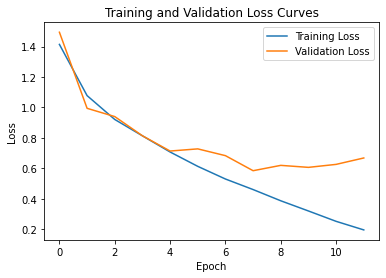

In [8]:
#8
import torch.optim as optim
# dropout设置为0.4


class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self.make_layer(64, 64, 2)
        self.layer2 = self.make_layer(64, 128, 2, stride=2)
        self.layer3 = self.make_layer(128, 256, 2, stride=2)
        self.dropout = nn.Dropout(0.4)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(ResidualBlock(in_channels, out_channels, stride))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x
    
    
lr = 0.001
decay_factor =  0.5

model = ResNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader, val_loader, test_loader = prepare_data(36)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=lr)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.3)  # Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=decay_factor, patience=5)

train_losses = []
val_losses = [] 
best_val_loss = float('inf')
patience = 4  
wait = 0

num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    val_loss = validate_model(val_loader, model, criterion)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
        torch.save(model.state_dict(), "best_model.pth")
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"No improvement for {patience} epochs, stopping early.")
            break
    scheduler.step(val_loss)


    print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch + 1, epoch_loss, val_loss))

# Plotting the loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

#test_model(test_loader, model, criterion)


Epoch [1/30], Step [100/625], Loss: 1.4238
Epoch [1/30], Step [200/625], Loss: 1.3085
Epoch [1/30], Step [300/625], Loss: 1.3615
Epoch [1/30], Step [400/625], Loss: 1.0840
Epoch [1/30], Step [500/625], Loss: 1.1028
Epoch [1/30], Step [600/625], Loss: 1.0261
Validation Loss: 1.1236, Accuracy on Val_data: 59.27%
Validation loss decreased (inf --> 1.123647). Saving model...
Epoch :1, Train Loss: 1.3098, Validation Loss: 1.1236
Epoch [2/30], Step [100/625], Loss: 0.9277
Epoch [2/30], Step [200/625], Loss: 0.8789
Epoch [2/30], Step [300/625], Loss: 1.2263
Epoch [2/30], Step [400/625], Loss: 0.8533
Epoch [2/30], Step [500/625], Loss: 1.1275
Epoch [2/30], Step [600/625], Loss: 0.9734
Validation Loss: 0.9493, Accuracy on Val_data: 66.46%
Validation loss decreased (1.123647 --> 0.949336). Saving model...
Epoch :2, Train Loss: 1.0233, Validation Loss: 0.9493
Epoch [3/30], Step [100/625], Loss: 0.9462
Epoch [3/30], Step [200/625], Loss: 0.8288
Epoch [3/30], Step [300/625], Loss: 0.8119
Epoch [3/3

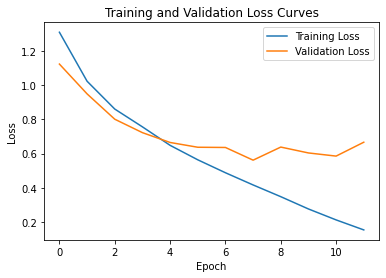

In [54]:
#9
import torch.optim as optim
# dropout设置为0.1


class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self.make_layer(64, 64, 2)
        self.layer2 = self.make_layer(64, 128, 2, stride=2)
        self.layer3 = self.make_layer(128, 256, 2, stride=2)
        self.dropout = nn.Dropout(0.1)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(ResidualBlock(in_channels, out_channels, stride))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x
    
    
lr = 0.001
decay_factor =  0.5

model = ResNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader, val_loader, test_loader = prepare_data(36)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=lr)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.3)  # Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=decay_factor, patience=5)

train_losses = []
val_losses = [] 
best_val_loss = float('inf')
patience = 4  
wait = 0

num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    val_loss = validate_model(val_loader, model, criterion)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
        torch.save(model.state_dict(), "best_model.pth")
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"No improvement for {patience} epochs, stopping early.")
            break
    scheduler.step(val_loss)


    print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch + 1, epoch_loss, val_loss))

# Plotting the loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

#test_model(test_loader, model, criterion)


Epoch [1/30], Step [100/625], Loss: 2.1249
Epoch [1/30], Step [200/625], Loss: 2.1358
Epoch [1/30], Step [300/625], Loss: 1.7727
Epoch [1/30], Step [400/625], Loss: 1.7693
Epoch [1/30], Step [500/625], Loss: 1.5228
Epoch [1/30], Step [600/625], Loss: 1.6652
Validation Loss: 1.6134, Accuracy on Val_data: 38.81%
Validation loss decreased (inf --> 1.613418). Saving model...
Epoch :1, Train Loss: 1.8628, Validation Loss: 1.6134
Epoch [2/30], Step [100/625], Loss: 1.5863
Epoch [2/30], Step [200/625], Loss: 1.5436
Epoch [2/30], Step [300/625], Loss: 1.5864
Epoch [2/30], Step [400/625], Loss: 1.4097
Epoch [2/30], Step [500/625], Loss: 1.1709
Epoch [2/30], Step [600/625], Loss: 1.4188
Validation Loss: 1.4063, Accuracy on Val_data: 48.25%
Validation loss decreased (1.613418 --> 1.406314). Saving model...
Epoch :2, Train Loss: 1.5101, Validation Loss: 1.4063
Epoch [3/30], Step [100/625], Loss: 1.3325
Epoch [3/30], Step [200/625], Loss: 1.4630
Epoch [3/30], Step [300/625], Loss: 1.1094
Epoch [3/3

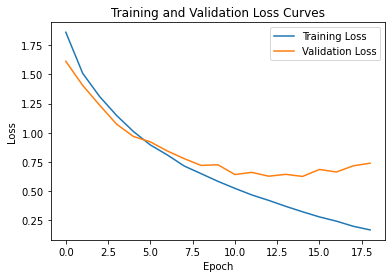

In [58]:
#没有batch normalization
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False)
            )

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = self.conv2(out)
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=5, stride=1, padding=1, bias=False)
        self.layer1 = self.make_layer(64, 64, 2)
        self.layer2 = self.make_layer(64, 128, 2, stride=2)
        self.layer3 = self.make_layer(128, 256, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(256, num_classes)

    def make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(ResidualBlock(in_channels, out_channels, stride))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x


lr = 0.001
decay_factor = 0.5

model = ResNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader, val_loader, test_loader = prepare_data(36)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=decay_factor, patience=5)

train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 4
wait = 0

num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    val_loss = validate_model(val_loader, model, criterion)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
        torch.save(model.state_dict(), "best_model.pth")
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"No improvement for {patience} epochs, stopping early.")
            break

    scheduler.step(val_loss)

    print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch + 1, epoch_loss, val_loss))

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

#test_model(test_loader, model, criterion)

Epoch [1/30], Step [100/625], Loss: 1.5725
Epoch [1/30], Step [200/625], Loss: 1.5125
Epoch [1/30], Step [300/625], Loss: 1.2987
Epoch [1/30], Step [400/625], Loss: 1.1213
Epoch [1/30], Step [500/625], Loss: 1.1452
Epoch [1/30], Step [600/625], Loss: 1.1621
Validation Loss: 1.0549, Accuracy on Val_data: 62.11%
Validation loss decreased (inf --> 1.054909). Saving model...
Epoch :1, Train Loss: 1.3655, Validation Loss: 1.0549
Epoch [2/30], Step [100/625], Loss: 1.1771
Epoch [2/30], Step [200/625], Loss: 1.0221
Epoch [2/30], Step [300/625], Loss: 0.7567
Epoch [2/30], Step [400/625], Loss: 0.9030
Epoch [2/30], Step [500/625], Loss: 1.1542
Epoch [2/30], Step [600/625], Loss: 1.0407
Validation Loss: 0.9173, Accuracy on Val_data: 67.02%
Validation loss decreased (1.054909 --> 0.917324). Saving model...
Epoch :2, Train Loss: 1.0241, Validation Loss: 0.9173
Epoch [3/30], Step [100/625], Loss: 0.9466
Epoch [3/30], Step [200/625], Loss: 0.7904
Epoch [3/30], Step [300/625], Loss: 0.8744
Epoch [3/3

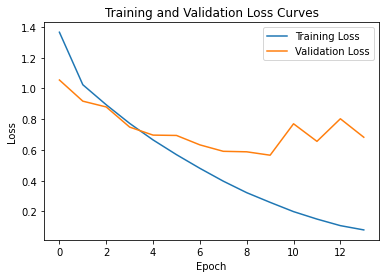

Average Test Loss: 0.7045, Accuracy on Test Set: 83.09%


In [63]:
#5
import torch.optim as optim
#卷积内核大小为2，原来为5


class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=2, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self.make_layer(64, 64, 2)
        self.layer2 = self.make_layer(64, 128, 2, stride=2)
        self.layer3 = self.make_layer(128, 256, 2, stride=2)
        self.dropout = nn.Dropout(0.2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(ResidualBlock(in_channels, out_channels, stride))
            in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x
    
    
lr = 0.001
decay_factor =  0.5

model = ResNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader, val_loader, test_loader = prepare_data(36)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=lr)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.3)  # Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=decay_factor, patience=5)

train_losses = []
val_losses = [] 
best_val_loss = float('inf')
patience = 4  
wait = 0

num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    val_loss = validate_model(val_loader, model, criterion)
    val_losses.append(val_loss)

    if val_loss < best_val_loss:
        print("Validation loss decreased ({:.6f} --> {:.6f}). Saving model...".format(best_val_loss, val_loss))
        torch.save(model.state_dict(), "best_model.pth")
        best_val_loss = val_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"No improvement for {patience} epochs, stopping early.")
            break
    scheduler.step(val_loss)


    print('Epoch :{}, Train Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch + 1, epoch_loss, val_loss))

# Plotting the loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

test_model(test_loader, model, criterion)
